In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Problem Statement - Predicting region and avergae price for an avocado</strong>

In [2]:
data = pd.read_csv('avocado.csv')
data.columns.values

array(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'], dtype=object)

In [3]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

<strong> Infromation about columns <p>
 Date - The date of the observation || Nominal<br>
AveragePrice - the average price of a single avocado || Continuos
<br>type - conventional or organic || Categorical
<br>year - the year || Ordinal
<br>Region - the city or region of the observation || Categorical
<br>Total Bags - Total Bags Sold || Continuos
<br>Small Bags - Small Bags Sold || Continuos
<br>XL Bags - XL Bags Sold || Continuos
<br>Total Volume - Total number of avocados sold || Continuos
<br>4046 - Total number of avocados with PLU 4046 sold || Continuos
<br>4225 - Total number of avocados with PLU 4225 sold || Continuos
<br>4770 - Total number of avocados with PLU 4770 sold || Continuos
 </p>
</strong>
   

<strong>We hae two problems at hand -: Regression and Classification, as we need to predict a continuos and a categorical variables</strong>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<strong>There are no null values in the dataset, and we need to drop two columns -: Date and Unnamed:0</strong>

In [6]:
data = data.drop(columns=['Unnamed: 0', 'Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


<h3>Exploratory Data Analysis</h3>

<h4>Scatter Plots</h4>

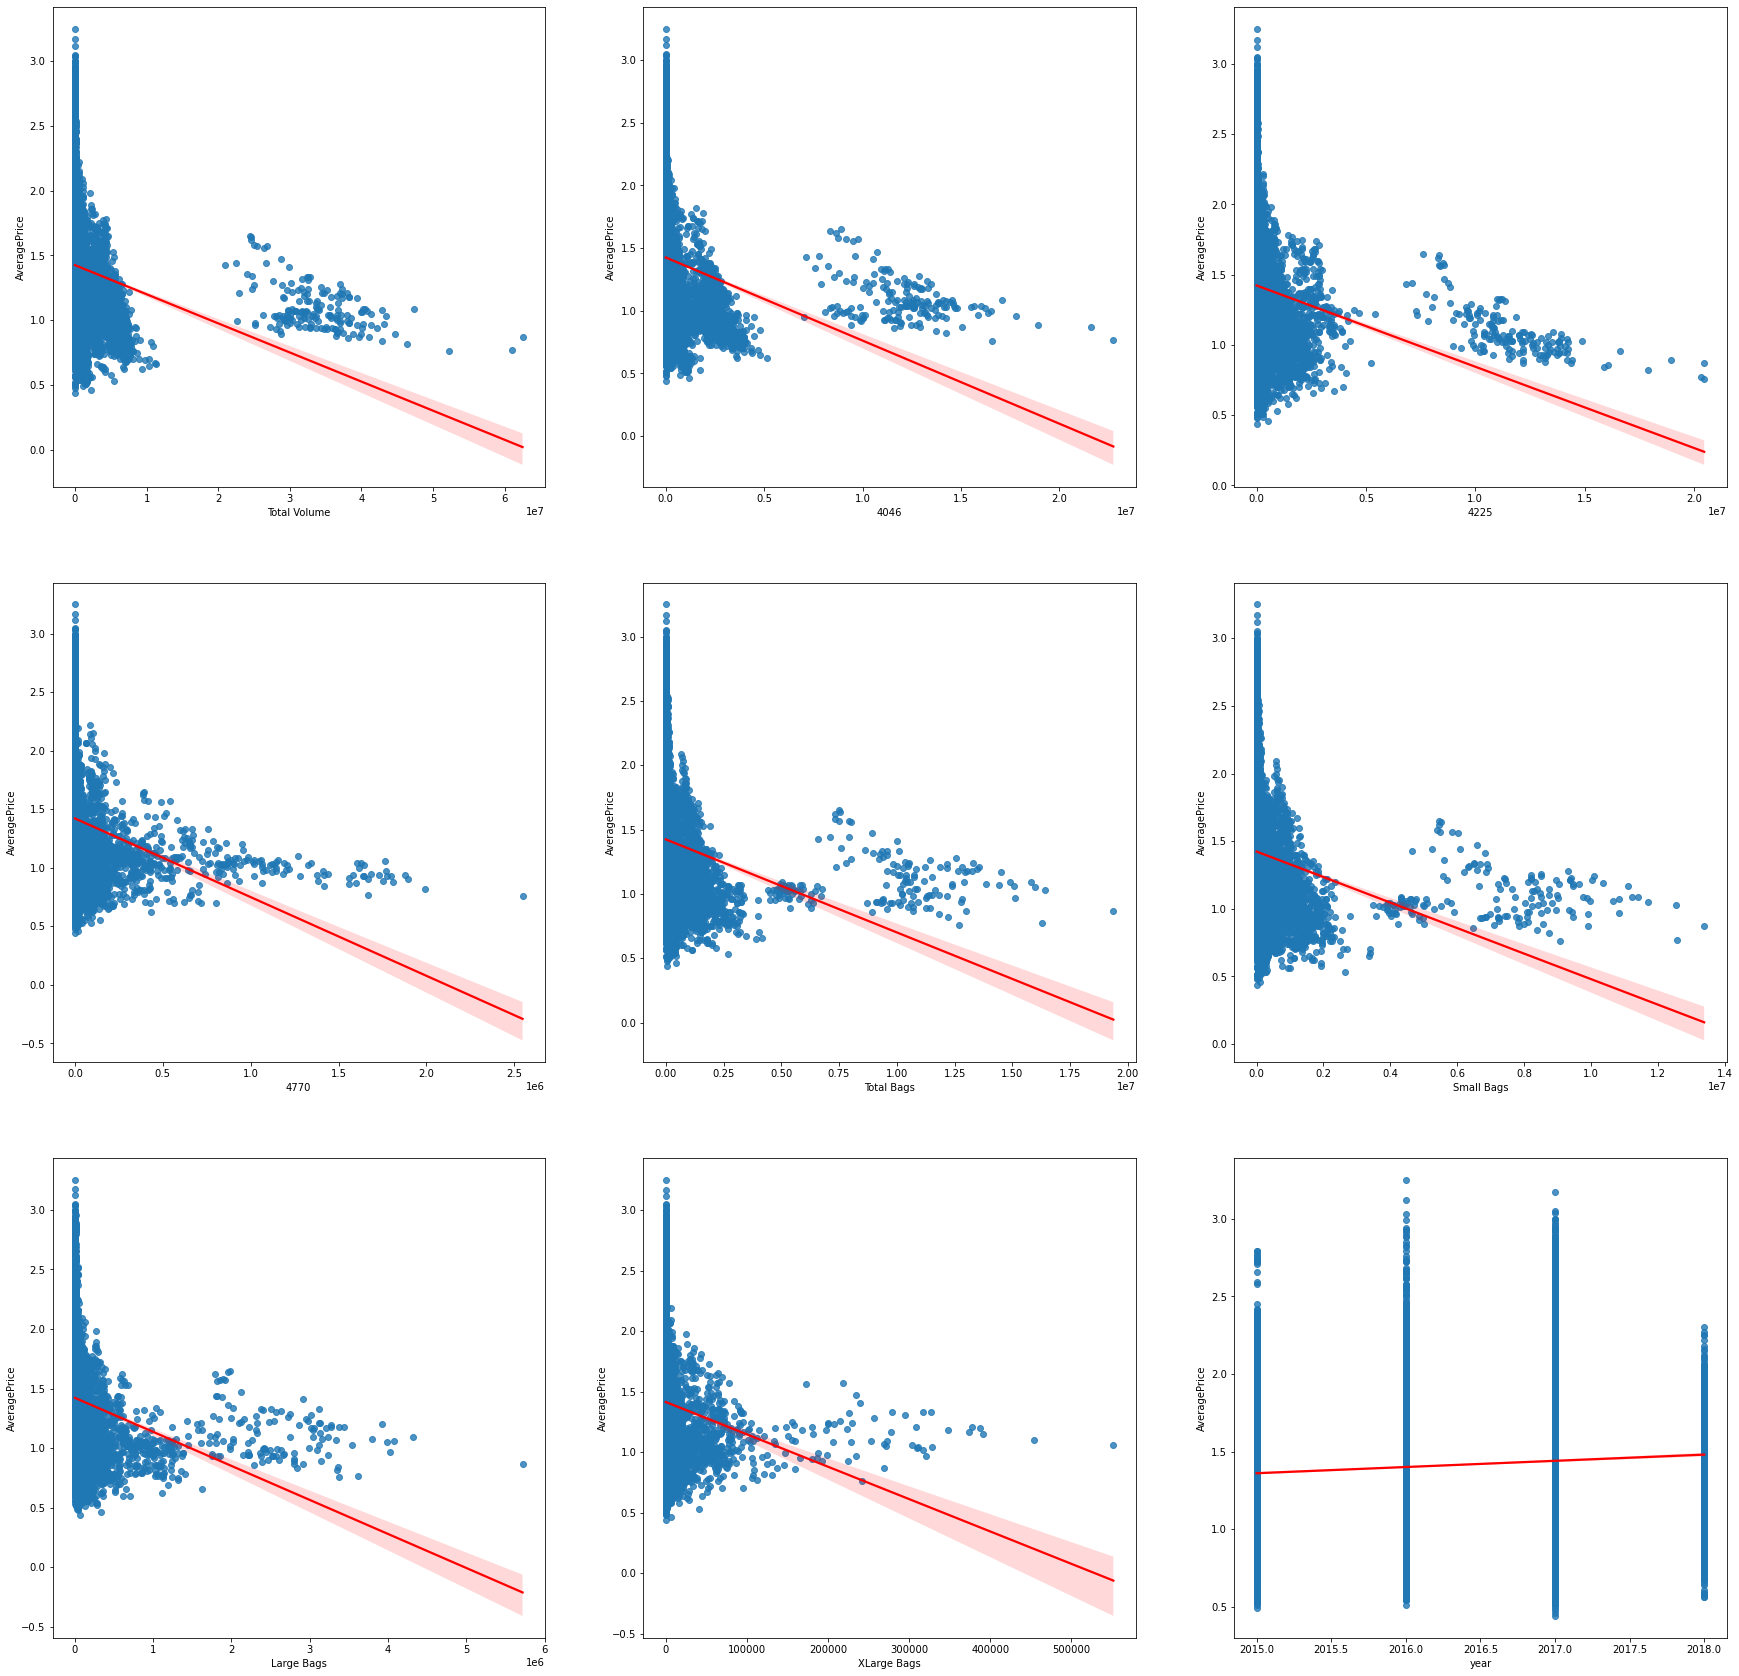

In [8]:
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'AveragePrice']
plt.figure(figsize=(30,30))
plotnumber=1
for col in num_cols:
    if col=='AveragePrice':
        continue
    plt.subplot(3,3,plotnumber)
    sns.regplot(y='AveragePrice', x=col, data=data, line_kws={'color':'red'})
    plotnumber+=1


<ul>
    <li>if Average Price is between 0.7 and 1.7 , Total Volume is hgiher than other prices. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.7 and 1.8 , 4046 is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.8 and 1.8 , 4226 is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.5 and 2.1 , 4770 is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.5 and 1.8 , Total Bags is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.5 and 1.8 , Smalls Bags is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.5 and 1.8 , Large Bags is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>if Average Price is between 0.5 and 2.0 , XLargeBags is higher than price in other range. Overall it follows a slight downward trend with Average Price</li>
    <li>Year 2016 has highest Sales and year 2018 has lowest. Overall positive trend with Avergae Price</li>
</ul>


<h4>StripPlots</h4>

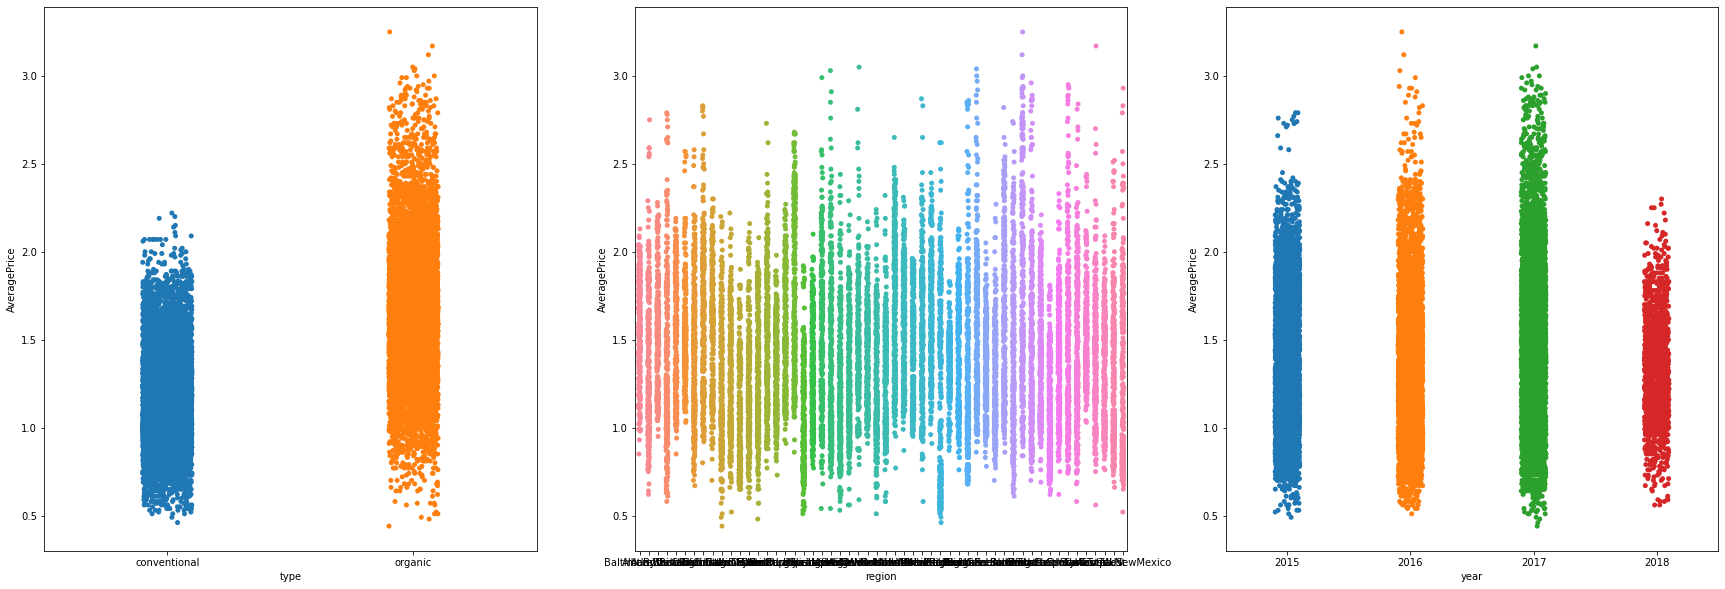

In [9]:
cat_cols = ['type', 'region', 'year']
plt.figure(figsize=(30,10))
plotnumber=1
for col in cat_cols:
    plt.subplot(1,3, plotnumber)
    sns.stripplot(x=col, y='AveragePrice', data=data)
    plotnumber+=1

<ul>
    <li>Organic type has higher average Price</li>
    <li>Some regions have high spread and some have low</li>
    <li>2016 and 2017 have higher Average Price compared to 2015 and 2018</li>
</ul>

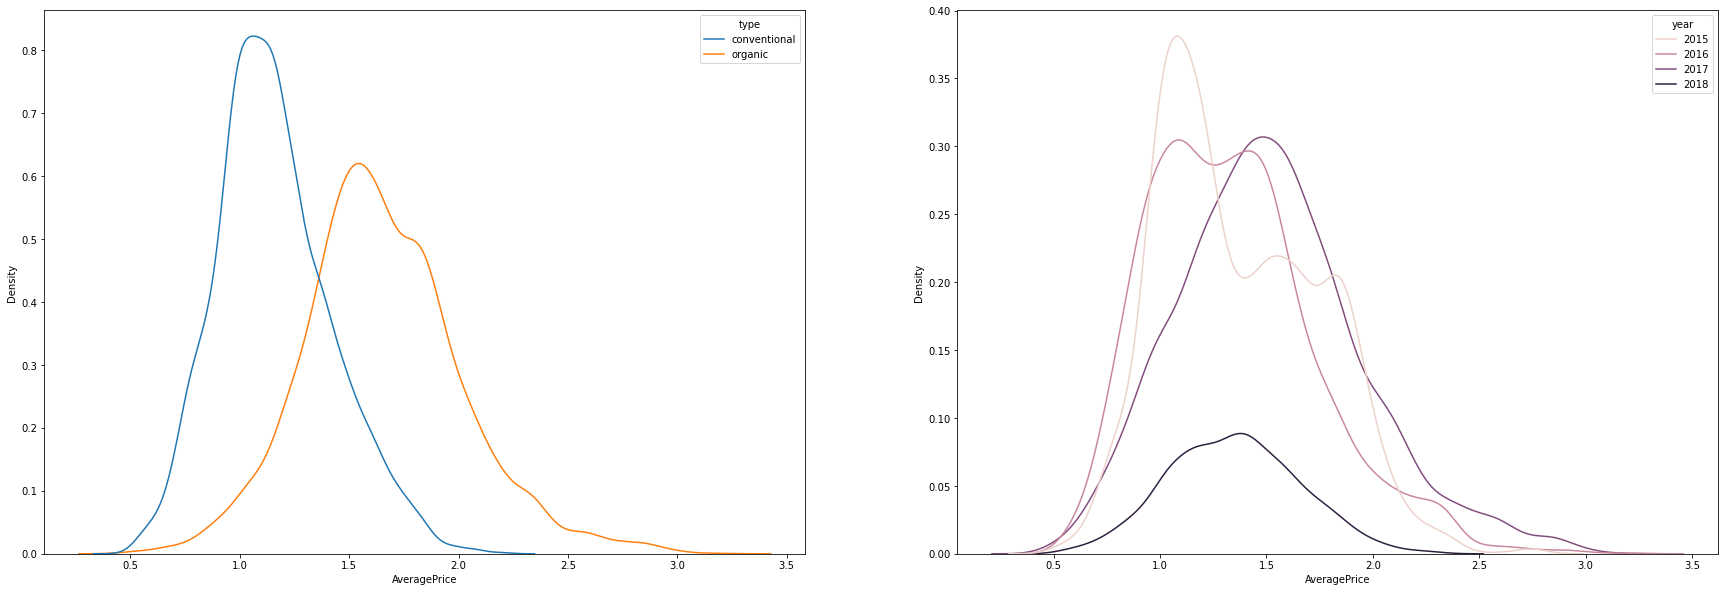

In [10]:
plt.figure(figsize=(30,10))
plotnumber = 1
for col in cat_cols:
    if col == 'region':
        continue
    plt.subplot(1,2,plotnumber)
    sns.kdeplot(x='AveragePrice',hue=col, data=data)
    plotnumber+=1

<ul>
    <li>Conventional Avovados are more dense around 1.0 while Organic are more dense around 1.6</li>
    <li>2016 has tow peaks one around 1.0 and other around 1.6</li>
</ul>

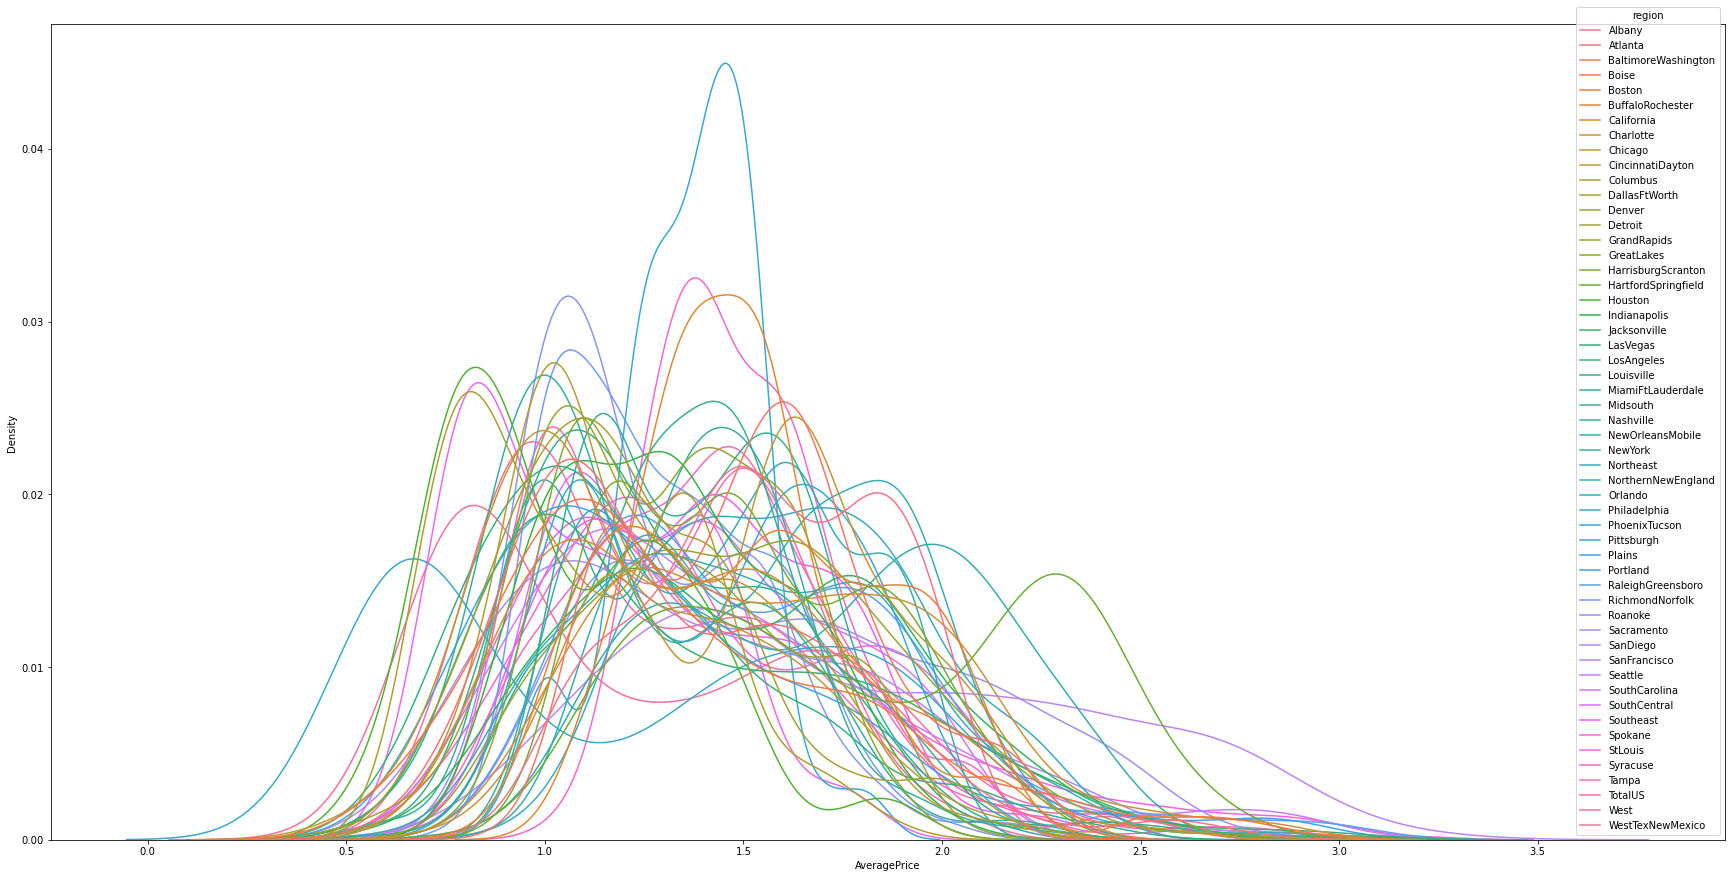

In [11]:
plt.figure(figsize=(30,15))
sns.kdeplot(x='AveragePrice', hue='region', data=data)

<strong>Most of the regions have two peaks one between 0.5to 1.0 and other between 1.5 ro 2.5</strong>
<strong>They can be probably based on the type of avocado</strong>

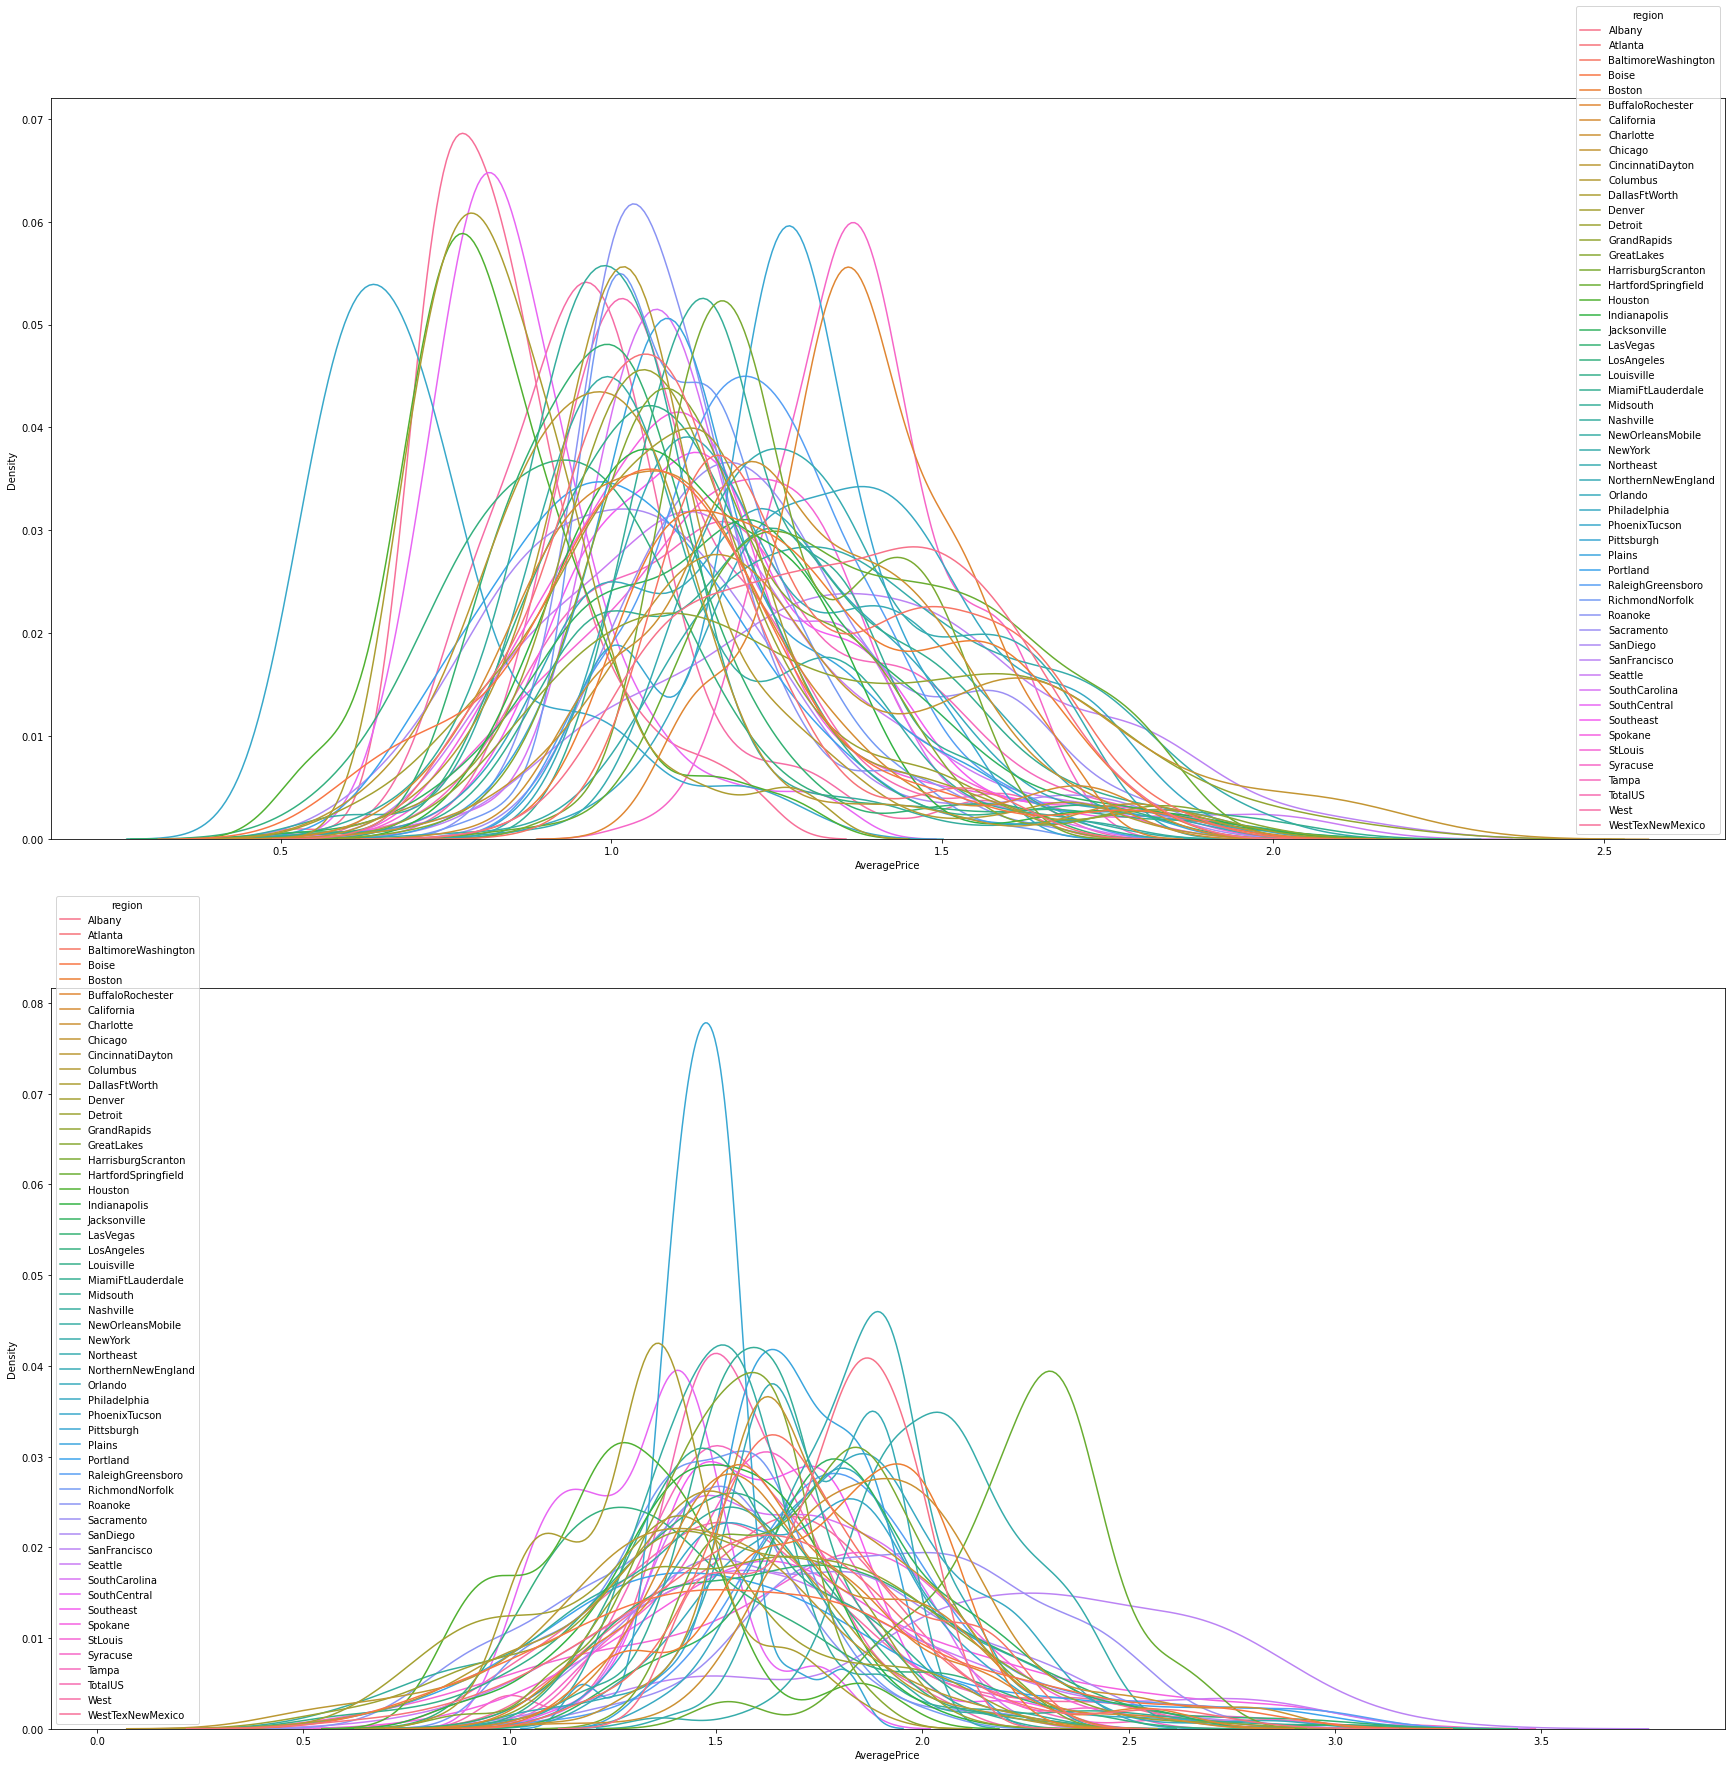

In [12]:
type_conv = data[data['type'] == 'conventional']
type_org = data[data['type'] =='organic']
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.kdeplot(x='AveragePrice', hue='region', data=type_conv)
plt.subplot(2,1,2)
sns.kdeplot(x='AveragePrice', hue='region', data=type_org)

<strong>Our initution was true as we can see that if we separated the data based on type , we are left with only one peak for each region</strong>

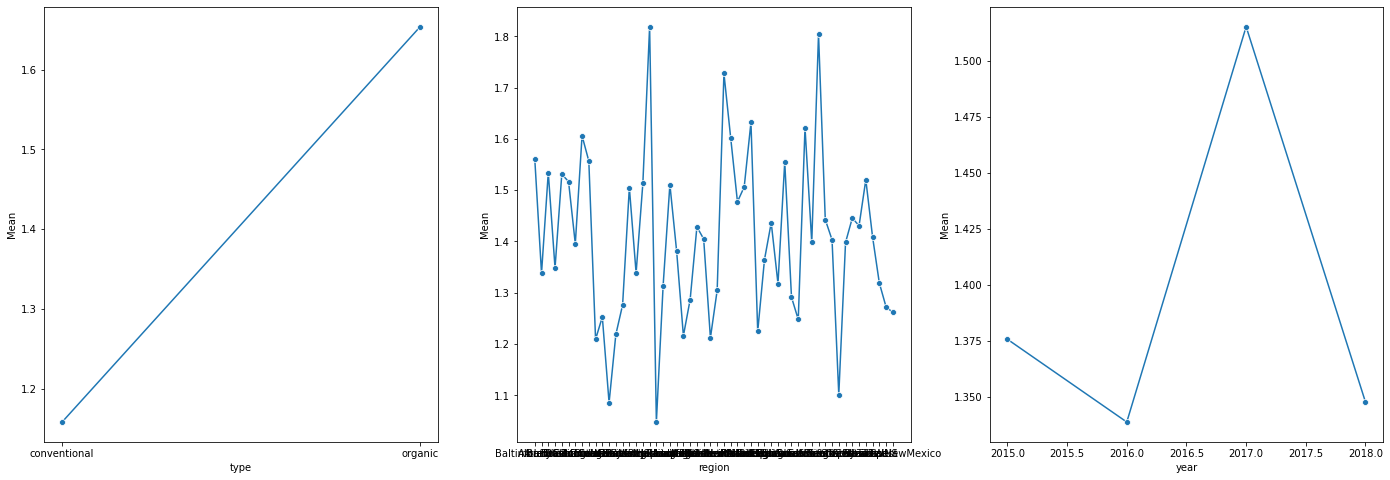

In [13]:
plt.figure(figsize=(24,8))
plotnumber = 1
for col in cat_cols:
    mean_vals = pd.DataFrame()
    unique_val = data[col].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data[col] == val]
        mean_val = mean_val['AveragePrice'].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(1,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

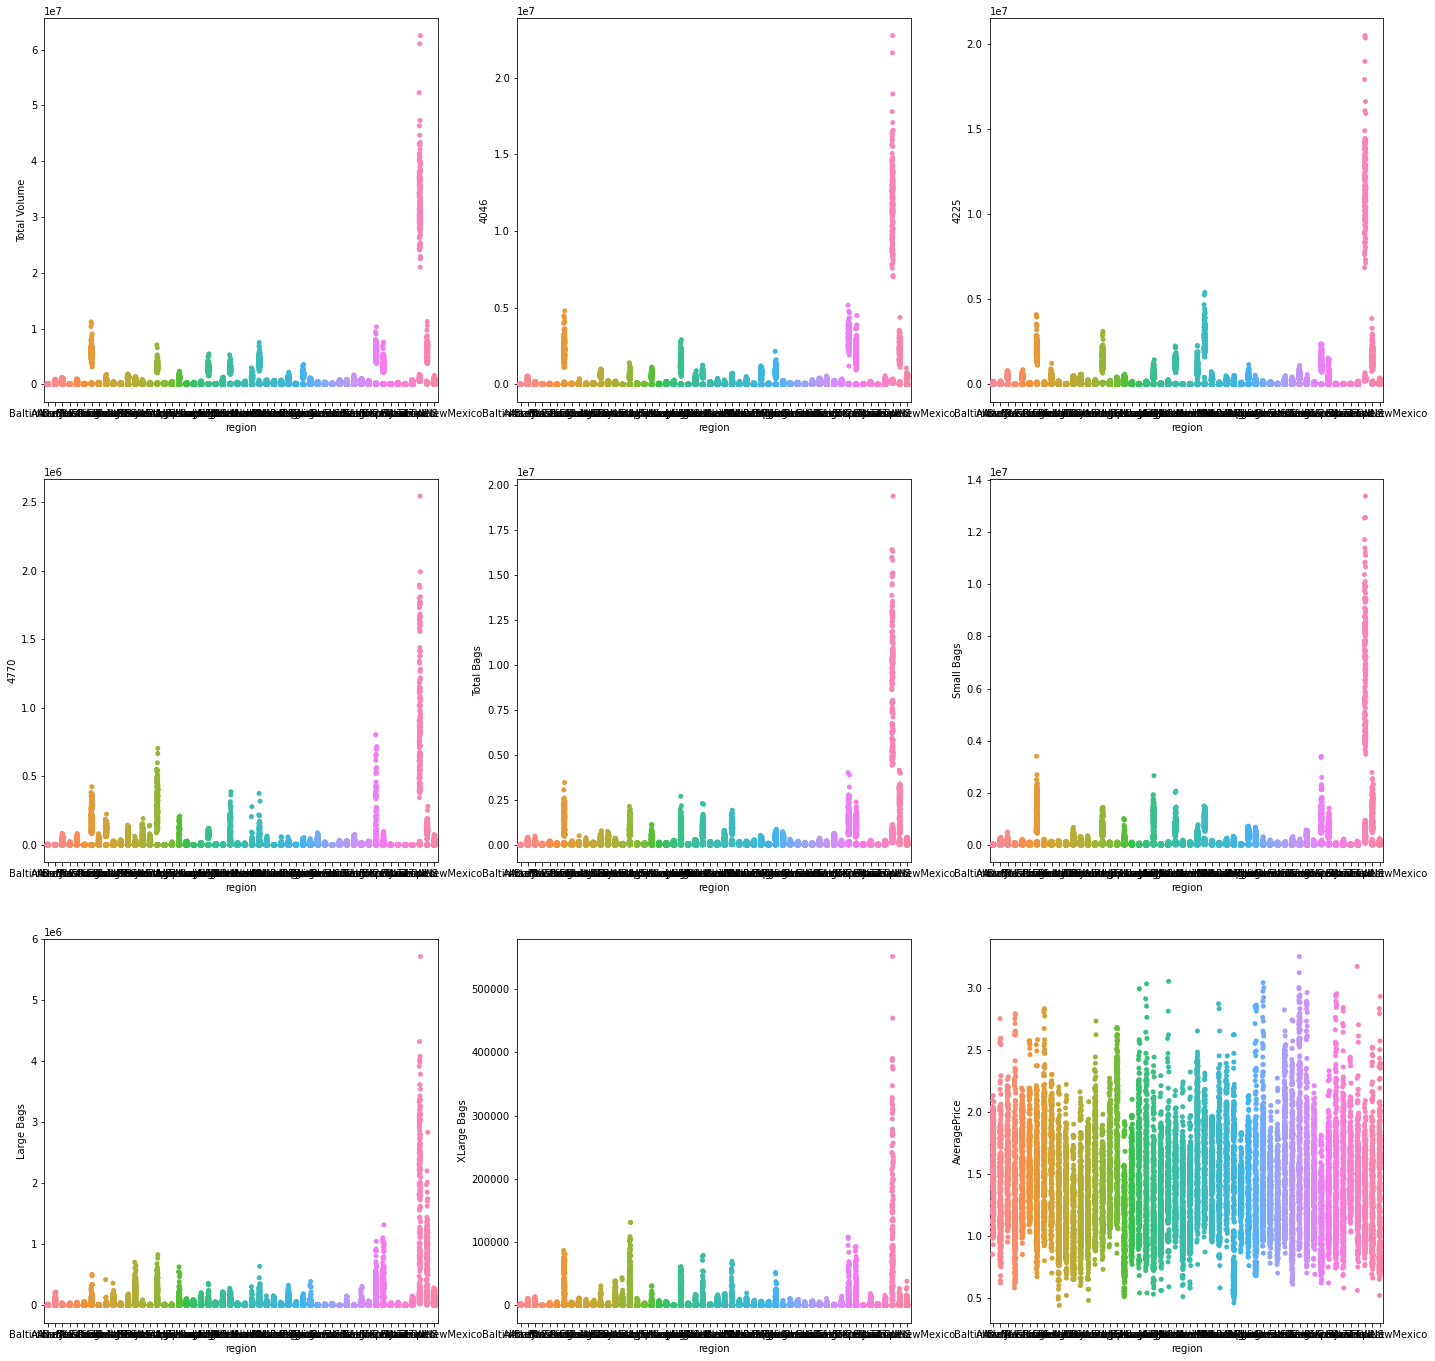

In [14]:
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'AveragePrice']
plt.figure(figsize=(24, 24))
plotnumber=1
for col in num_cols:
    if col!='year':
        plt.subplot(3,3,plotnumber)
        sns.stripplot(x='region', y=col, data=data)
        plotnumber+=1

Cannot Interpret anytihing from above plots, except the fact that two or three regions have higher number of sales

<h4>Descriptive Statistics</h4>

In [15]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
data.describe()

AveragePrice       Total Volume               4046  \
count 18249.000000000    18249.000000000    18249.000000000   
mean      1.405978410   850644.013008932   293008.424530659   
std       0.402676555  3453545.355399471  1264989.081762777   
min       0.440000000       84.560000000        0.000000000   
25%       1.100000000    10838.580000000      854.070000000   
50%       1.370000000   107376.760000000     8645.300000000   
75%       1.660000000   432962.290000000   111020.200000000   
max       3.250000000 62505646.520000003 22743616.170000002   

                    4225              4770         Total Bags  \
count    18249.000000000   18249.000000000    18249.000000000   
mean    295154.568356074   22839.735992657   239639.202059839   
std    1204120.401135051  107464.068435371   986242.399216412   
min          0.000000000       0.000000000        0.000000000   
25%       3008.780000000       0.000000000     5088.640000000   
50%      29061.020000000     184.990000000    39743.830000000   
75%     150206.860000000    6243.420000000   110783.370000000   
max   20470572.609999999 2546439.110000000 19373134.370000001   

              Small Bags        Large Bags      XLarge Bags            year  
count    18249.000000000   18249.000000000  18249.000000000 18249.000000000  
mean    182194.686695709   54338.088144556   3106.426507206  2016.147898515  
std     746178.514961789  243965.964547409  17692.894651916     0.939938467  
min          0.000000000       0.000000000      0.000000000  2015.000000000  
25%       2849.420000000     127.470000000      0.000000000  2015.000000000  
50%      26362.820000000    2647.710000000      0.000000000  2016.000000000  
75%      83337.670000000   22029.250000000    132.500000000  2017.000000000  
max   13384586.800000001 5719096.610000000 551693.650000000  2018.000000000

<ul>
    <li>Average Price
        <ul>
            <li>Mean -: 1.405 </li>
            <li>STD -: 0.40</li>
            <li>Min -: 0.44</li>
            <li>Max -: 3.25</li>
        </ul>
    </li>
    <li>Total Volume
        <ul>
            <li>Mean -: 850644.01</li>
            <li>STD -: 3453545.35</li>
            <li>Min -: 84.56</li>
            <li>Max -: 62505646.52</li>
        </ul>
    </li>
    <li>4046
        <ul>
            <li>Mean -: 293008.424530659</li>
            <li>STD -: 1264989.081762777</li>
            <li>Min -: 0.000000000	</li>
            <li>Max -: 22743616.170000002</li>
        </ul>
    </li>
    <li>4225
        <ul>
            <li>Mean -: 295154.568356074</li>
            <li>STD -: 1204120.401135051</li>
            <li>Min -: 0.000000000</li>
            <li>Max -: 20470572.609999999</li>
        </ul>
    </li>
    <li>4770
        <ul>
            <li>Mean -: 22839.735992657	</li>
            <li>STD -: 107464.068435371</li>
            <li>Min -: 0.000000000</li>
            <li>Max -: 2546439.110000000</li>
        </ul>
    </li>
    <li>Total Bags
        <ul>
            <li>Mean -: 239639.202059839</li>
            <li>STD -: 986242.399216412</li>
            <li>Min -: 0.000000000</li>
            <li>Max -: 19373134.370000001</li>
        </ul>
    </li>
    <li>Small Bags
        <ul>
            <li>Mean -: 182194.686695709</li>
            <li>STD -: 746178.514961789</li>
            <li>Min -: 0.000000000</li>
            <li>Max -: 13384586.800000001</li>
        </ul>
    </li>
    <li>Large Bags
        <ul>
            <li>Mean -: 18249.000000000</li>
            <li>STD -: 243965.964547409</li>
            <li>Min -: 0.000000000</li>
            <li>Max -: 5719096.610000000</li>
        </ul>
    </li>
    <li>XLarge Bags
        <ul>
            <li>Mean -: 3106.426507206</li>
            <li>STD -: 17692.894651916</li>
            <li>Min -: 0.000000000</li>
            <li>Max -: 551693.650000000	</li>
        </ul>
    </li>
</ul>

<strong>This dataset cleary has very high variance as STD of some columns is higher than their mean, So we have to carefully preprcess it otherwise many of our features will be lost</strong>

<h4>Correaltion MAtrix</h4>

In [16]:
data.corr()

AveragePrice  Total Volume         4046         4225  \
AveragePrice   1.000000000  -0.192752387 -0.208317048 -0.172927773   
Total Volume  -0.192752387   1.000000000  0.977863159  0.974180820   
4046          -0.208317048   0.977863159  1.000000000  0.926109956   
4225          -0.172927773   0.974180820  0.926109956  1.000000000   
4770          -0.179445984   0.872202250  0.833389104  0.887854998   
Total Bags    -0.177087928   0.963047082  0.920056581  0.905787453   
Small Bags    -0.174729784   0.967238237  0.925279872  0.916031233   
Large Bags    -0.172940010   0.880639633  0.838645015  0.810015226   
XLarge Bags   -0.117591623   0.747157367  0.699377286  0.688808748   
year           0.093196984   0.017192911  0.003353348 -0.009559070   

                     4770   Total Bags   Small Bags   Large Bags  XLarge Bags  \
AveragePrice -0.179445984 -0.177087928 -0.174729784 -0.172940010 -0.117591623   
Total Volume  0.872202250  0.963047082  0.967238237  0.880639633  0.747157367   
4046          0.833389104  0.920056581  0.925279872  0.838645015  0.699377286   
4225          0.887854998  0.905787453  0.916031233  0.810015226  0.688808748   
4770          1.000000000  0.792314293  0.802732954  0.698471020  0.679861053   
Total Bags    0.792314293  1.000000000  0.994334553  0.943009069  0.804232590   
Small Bags    0.802732954  0.994334553  1.000000000  0.902588865  0.806844627   
Large Bags    0.698471020  0.943009069  0.902588865  1.000000000  0.710858415   
XLarge Bags   0.679861053  0.804232590  0.806844627  0.710858415  1.000000000   
year         -0.036530648  0.071552393  0.063914691  0.087891458  0.081033071   

                     year  
AveragePrice  0.093196984  
Total Volume  0.017192911  
4046          0.003353348  
4225         -0.009559070  
4770         -0.036530648  
Total Bags    0.071552393  
Small Bags    0.063914691  
Large Bags    0.087891458  
XLarge Bags   0.081033071  
year          1.000000000

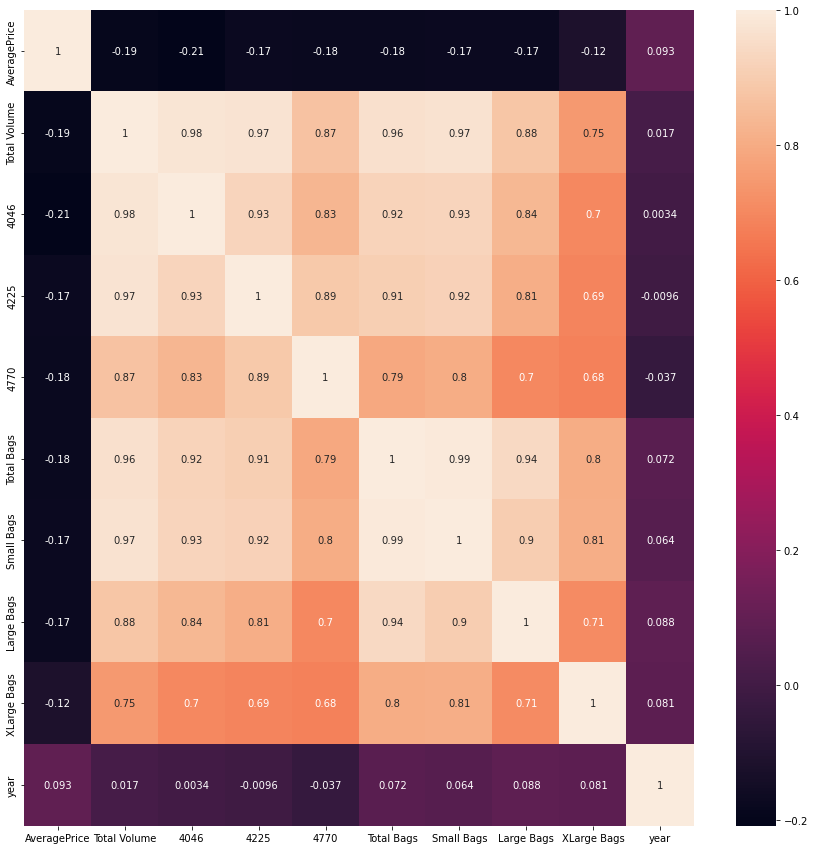

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

<strong>
    <ul>
        <li>Average Price has correlation of -19% with Total Volume</li>
        <li>Average Price has correlation of -21% with 4046 </li>
        <li>Average Price has correlation of  -17% with 4225 </li>
        <li>Average Price has correlation of -18% with 4770 </li>
        <li>Average Price has correlation of  -18% with Total Bags</li>
        <li>Average Price has correlation of  -17% with Small Bags</li>
        <li>Average Price has correlation of  -17% with Large Bags</li>
        <li>Average Price has correlation opf -12% with XLargeBags</li>
    </ul>
</strong>
<strong>Many other variables are highly correlated with each other, there can be a high multicollinearity problem</strong>

<Figure size 1080x1080 with 0 Axes>

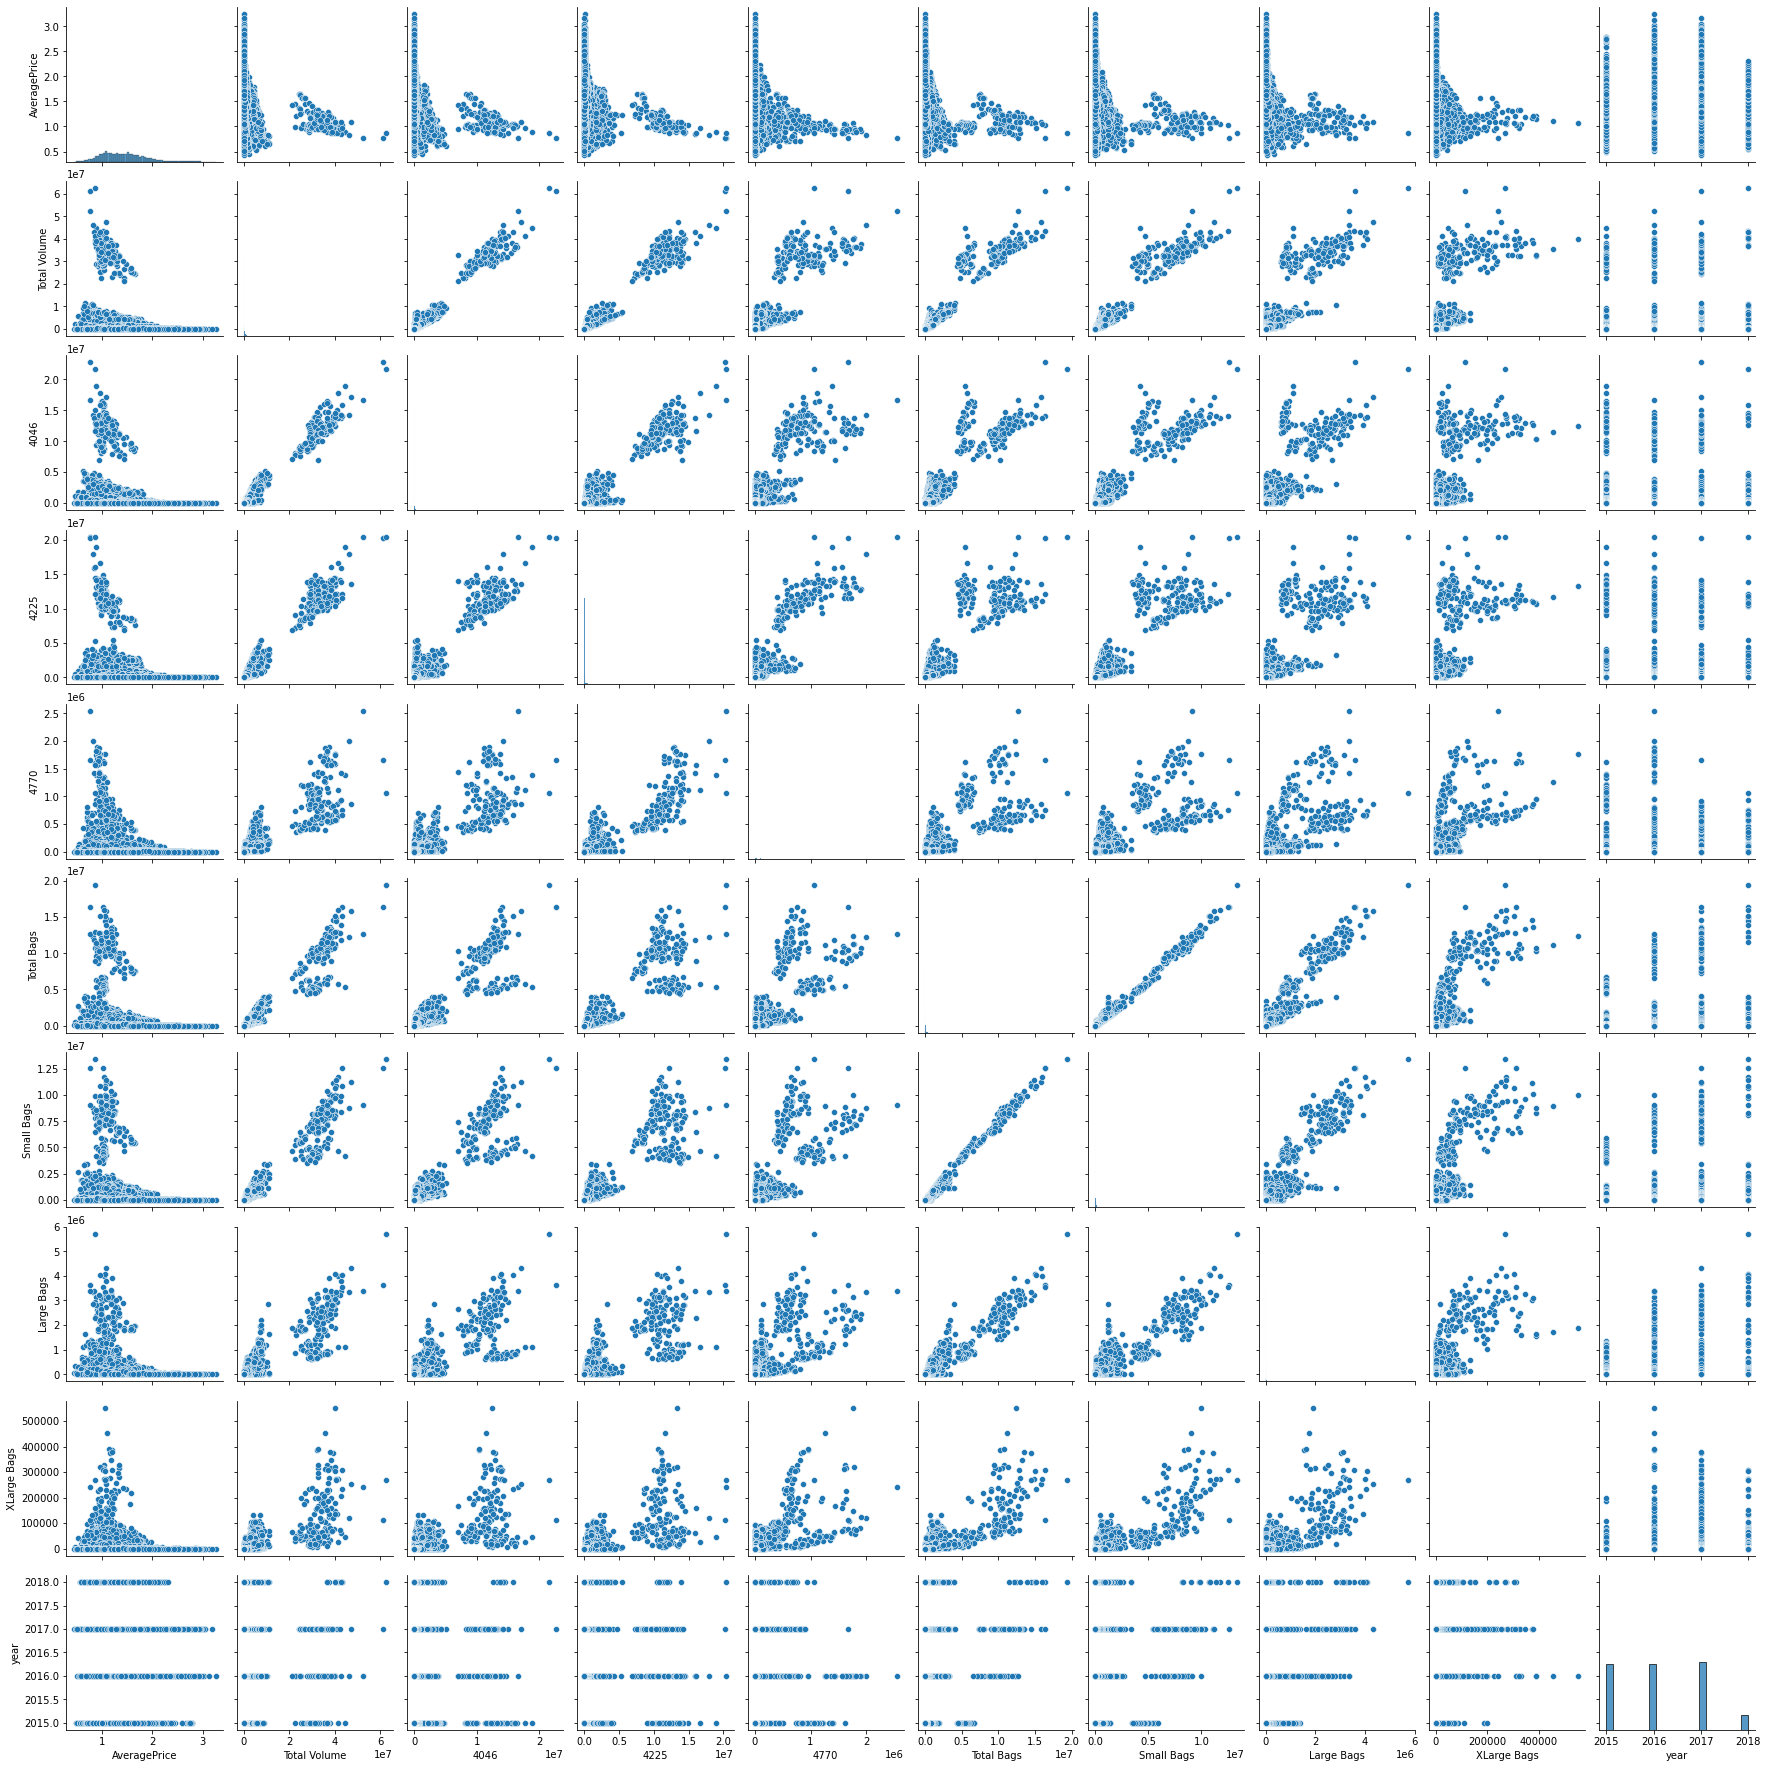

In [18]:
plt.figure(figsize=(15,15))
sns.pairplot(data)

<h4>Preprocessing</h4>

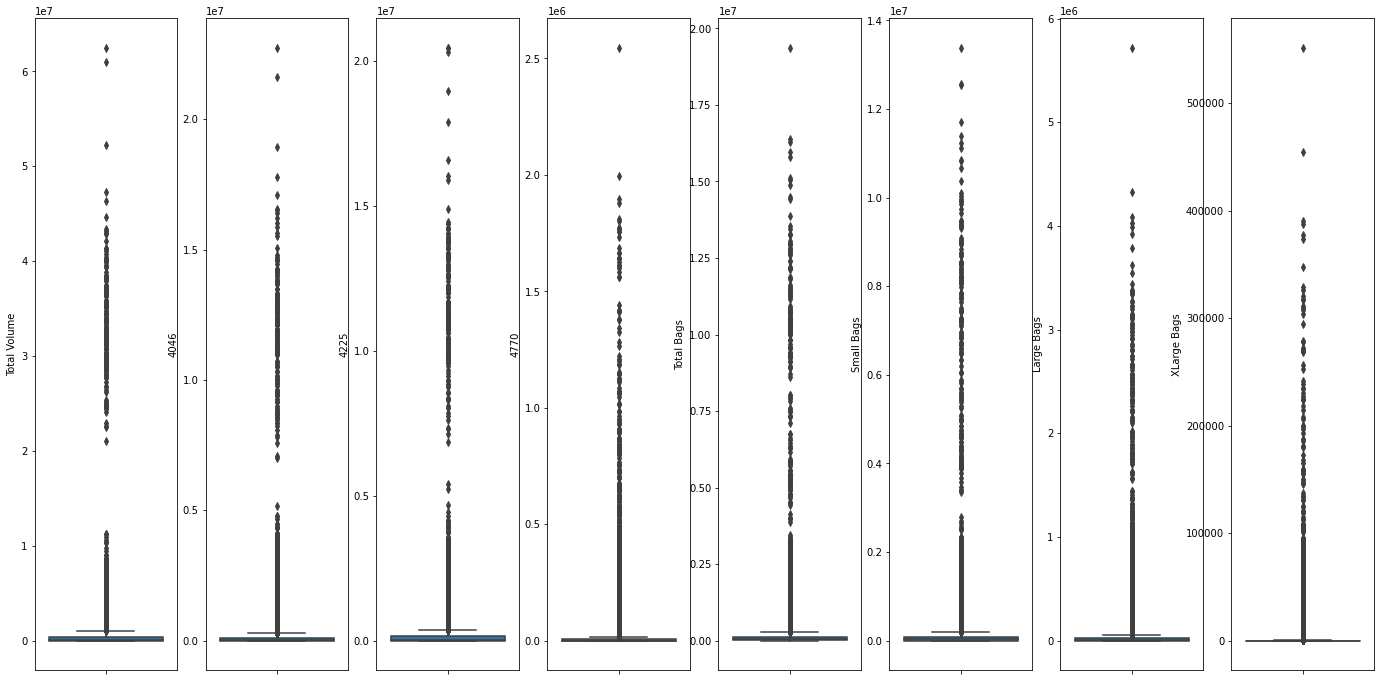

In [19]:
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
plt.figure(figsize=(24,12))
plotnumber = 1
for col in num_cols:
    plt.subplot(1,8, plotnumber)
    sns.boxplot(y=data[col])
    plotnumber+=1

<strong>All the independet numerical varibales have very high number of outliers</strong>

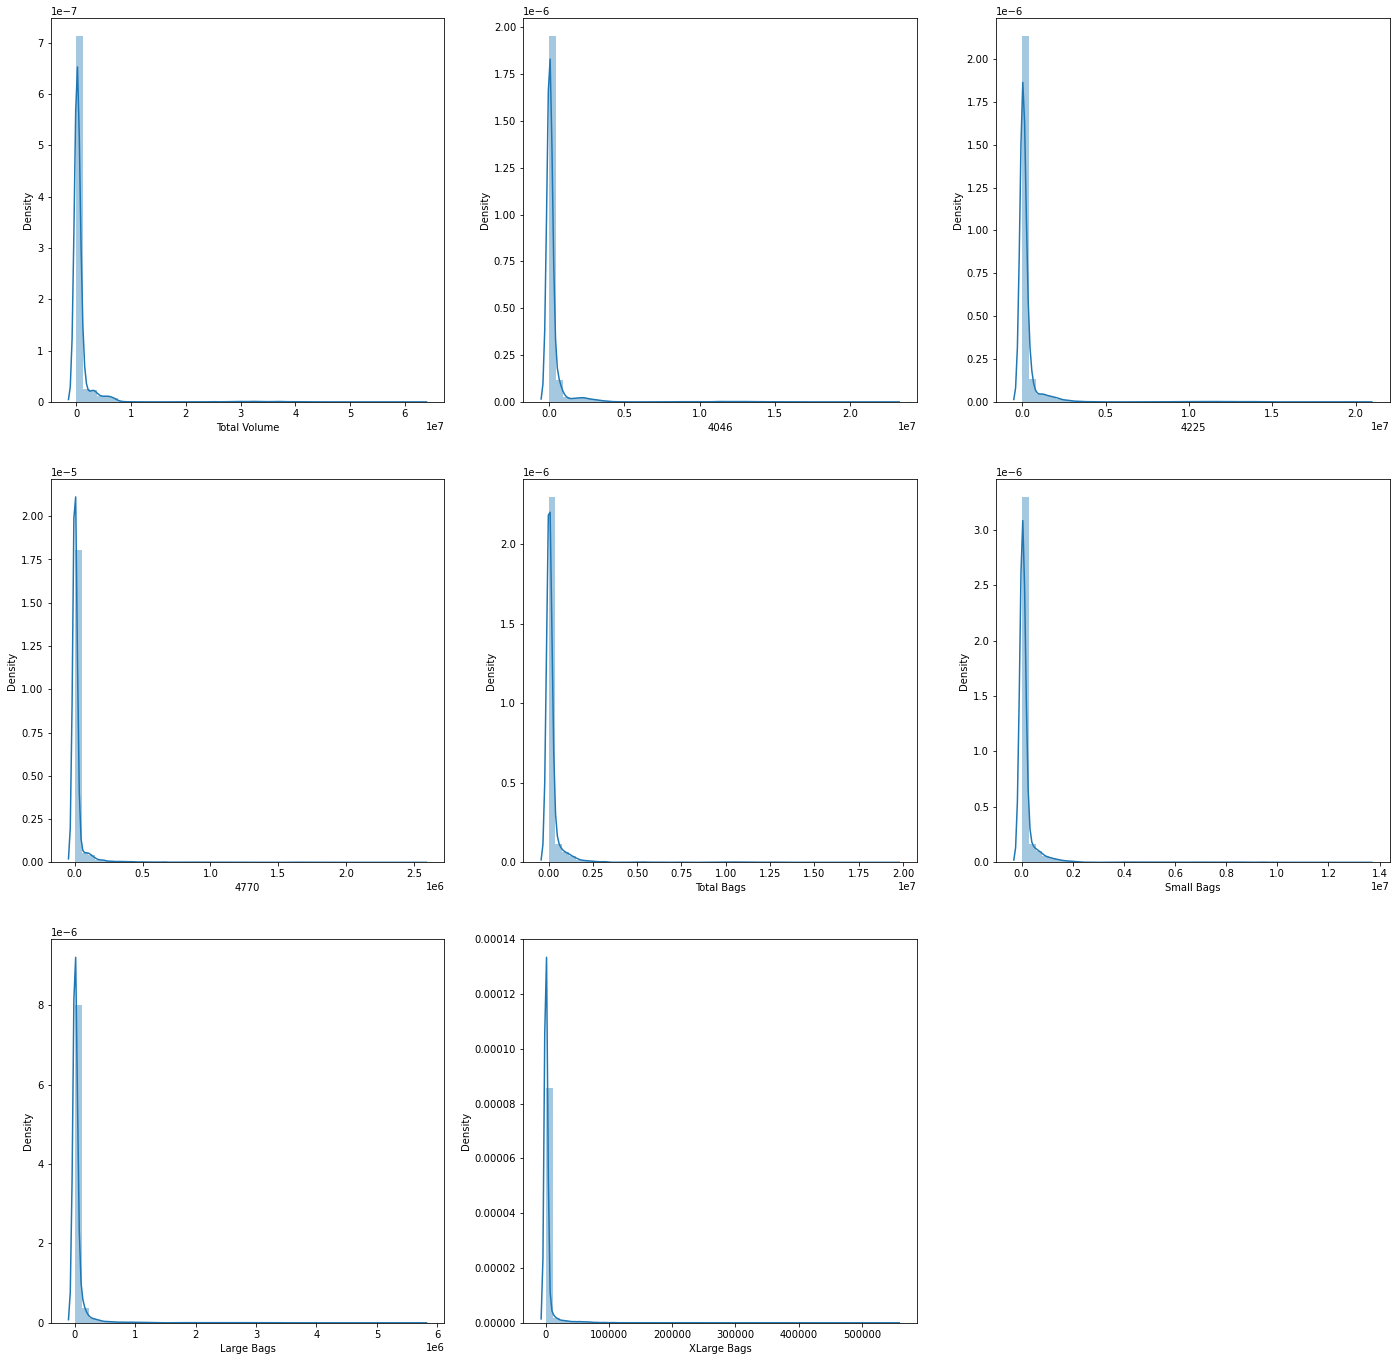

In [20]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data[col])
    plotnumber+=1

<strong>All the columns are skewed to the left</strong>

In [21]:
data.skew()

AveragePrice    0.580302738
Total Volume    9.007687479
4046            8.648219757
4225            8.942465608
4770           10.159395627
Total Bags      9.756071670
Small Bags      9.540659982
Large Bags      9.796454599
XLarge Bags    13.139750686
year            0.215338687
dtype: float64

In [22]:
X = data[num_cols]
print(X.shape)

(18249, 8)


In [23]:
from scipy.stats import zscore
z = np.abs(zscore(X))

In [24]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

Old Shape (18249, 12)
New Shape (17782, 12)
Total Dropped Rows 467


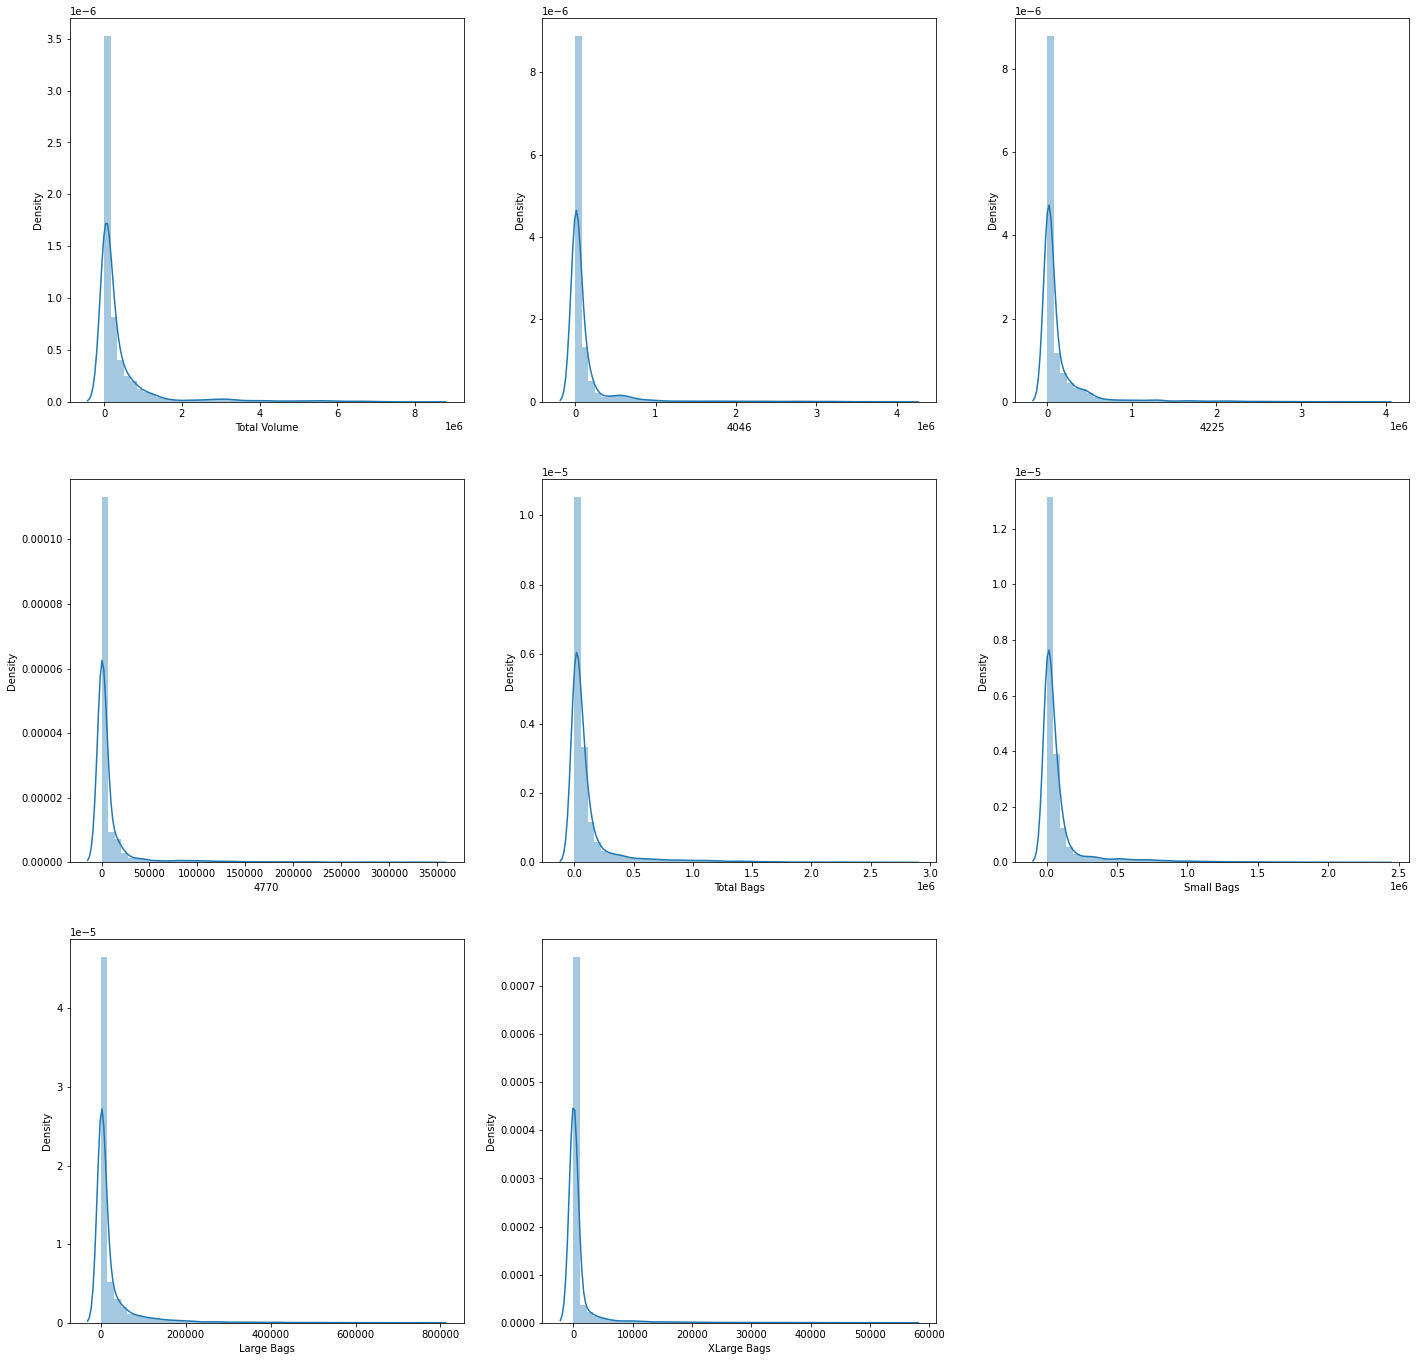

In [25]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data_new[col])
    plotnumber+=1

In [26]:
data_new.skew()

AveragePrice   0.560969208
Total Volume   3.782060361
4046           4.928849502
4225           4.472728690
4770           5.137119700
Total Bags     4.082102593
Small Bags     4.238646766
Large Bags     5.072467959
XLarge Bags    6.159391033
year           0.220791501
dtype: float64

<strong>We have used Z-score technique but we have still left lot of skewness</strong>

<h4>Power Transform</h4>

In [27]:
from sklearn.preprocessing import power_transform

for col in num_cols:
    data_new[col] = power_transform(np.array(data_new[col]).reshape(-1,1), method='yeo-johnson').reshape(17782,)

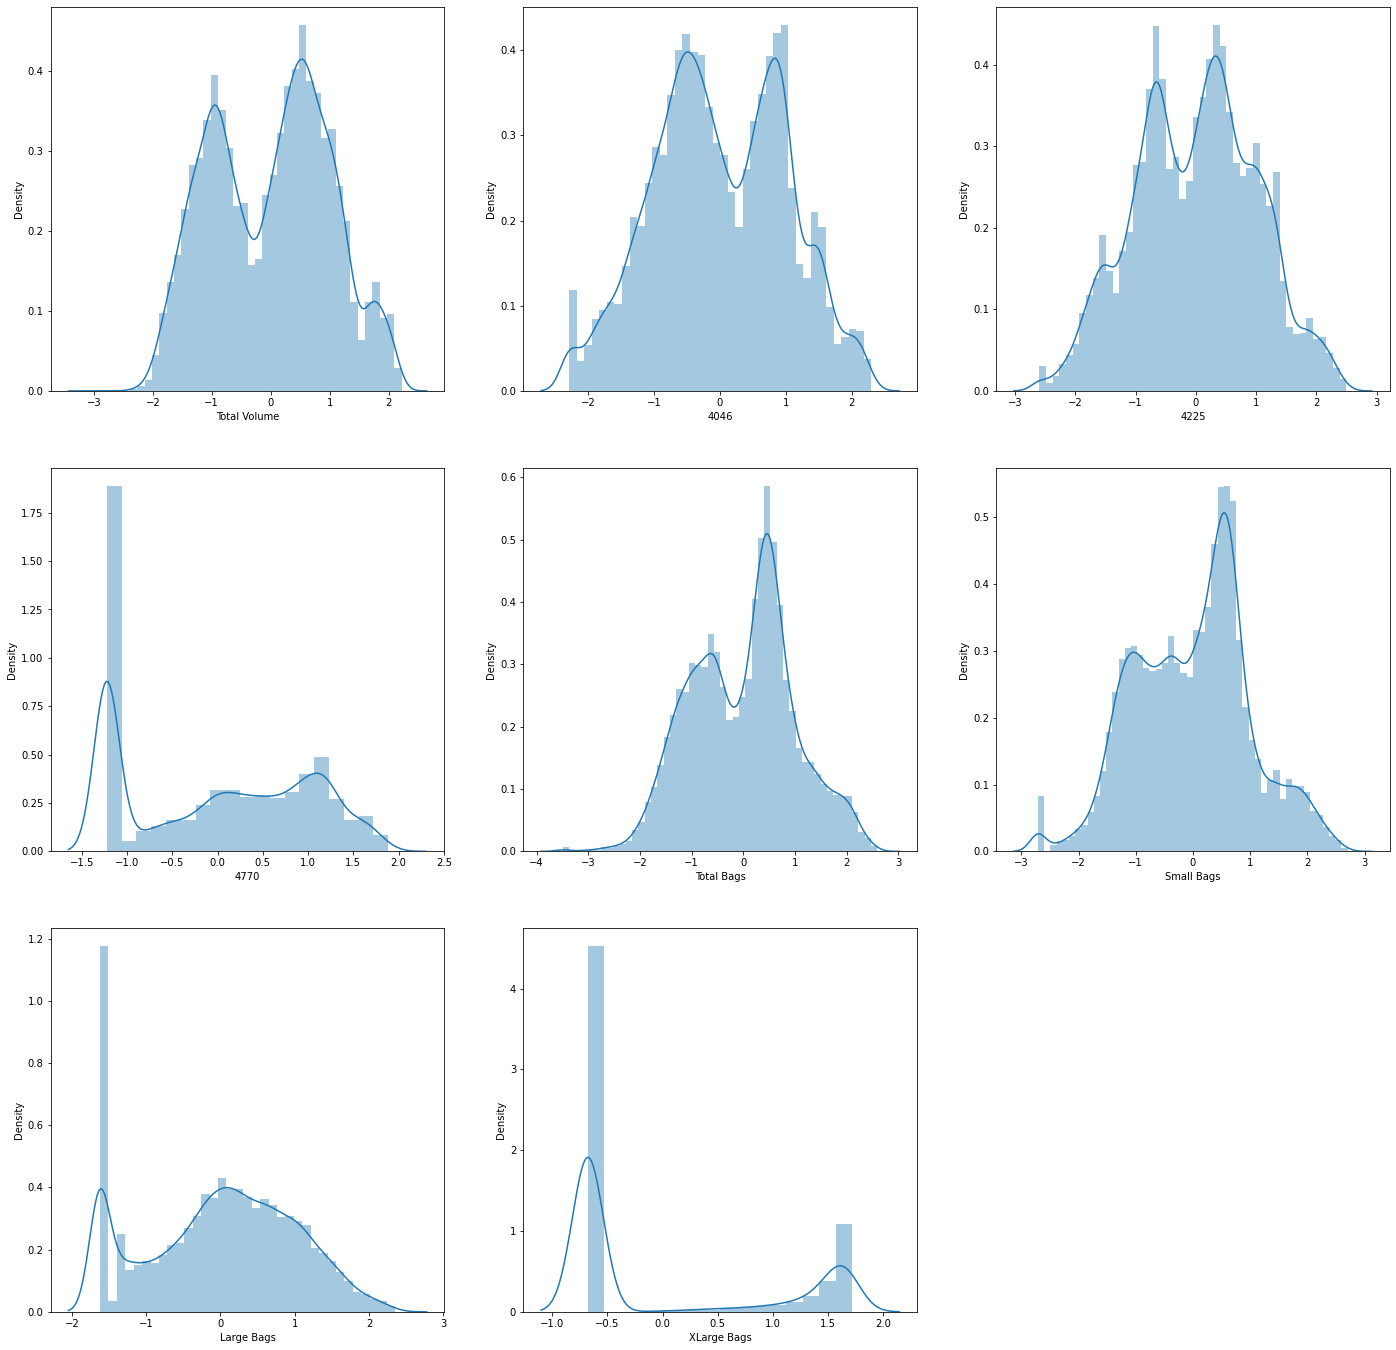

In [28]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data_new[col])
    plotnumber+=1

In [29]:
data_new.skew()

AveragePrice    0.560969208
Total Volume   -0.006808978
4046           -0.038258671
4225           -0.043245586
4770            0.028014717
Total Bags     -0.021531268
Small Bags     -0.024656983
Large Bags     -0.110061419
XLarge Bags     0.860602861
year            0.220791501
dtype: float64

<strong>We have removed skewness from all the columns except XLarge Bags, Let's see if it is important for out prediction or not</strong>

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif, k=8)
y = data_new.AveragePrice
X = data_new[num_cols]
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(8, 'Score'))

   Feature_Name        Score
0  Total Volume 39.927250244
1          4046 36.480180630
4    Total Bags 35.879123964
3          4770 27.651100821
5    Small Bags 25.039951443
6    Large Bags 23.354746634
2          4225 21.772853440
7   XLarge Bags 15.065353289


<strong>We can see that XLargeBags is the least contritbuting column, so we can drop it from our dataset</strong>

In [31]:
data_reg = data_new.drop(columns=['XLarge Bags'])
data_reg.skew()

AveragePrice    0.560969208
Total Volume   -0.006808978
4046           -0.038258671
4225           -0.043245586
4770            0.028014717
Total Bags     -0.021531268
Small Bags     -0.024656983
Large Bags     -0.110061419
year            0.220791501
dtype: float64

In [32]:
data_reg = data_reg.astype({'year':'str'})

In [33]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17782 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17782 non-null  float64
 1   Total Volume  17782 non-null  float64
 2   4046          17782 non-null  float64
 3   4225          17782 non-null  float64
 4   4770          17782 non-null  float64
 5   Total Bags    17782 non-null  float64
 6   Small Bags    17782 non-null  float64
 7   Large Bags    17782 non-null  float64
 8   type          17782 non-null  object 
 9   year          17782 non-null  object 
 10  region        17782 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.6+ MB


<h4>Scaling the dataset</h4>

In [34]:
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for col in num_cols:
    data_reg[col] = sc.fit_transform(np.array(data_reg[col]).reshape(-1,1)).reshape(17782,)
    
data_reg.mean()

AveragePrice    1.415546058
Total Volume    0.000000000
4046            0.000000000
4225           -0.000000000
4770            0.000000000
Total Bags      0.000000000
Small Bags     -0.000000000
Large Bags     -0.000000000
year                    inf
dtype: float64

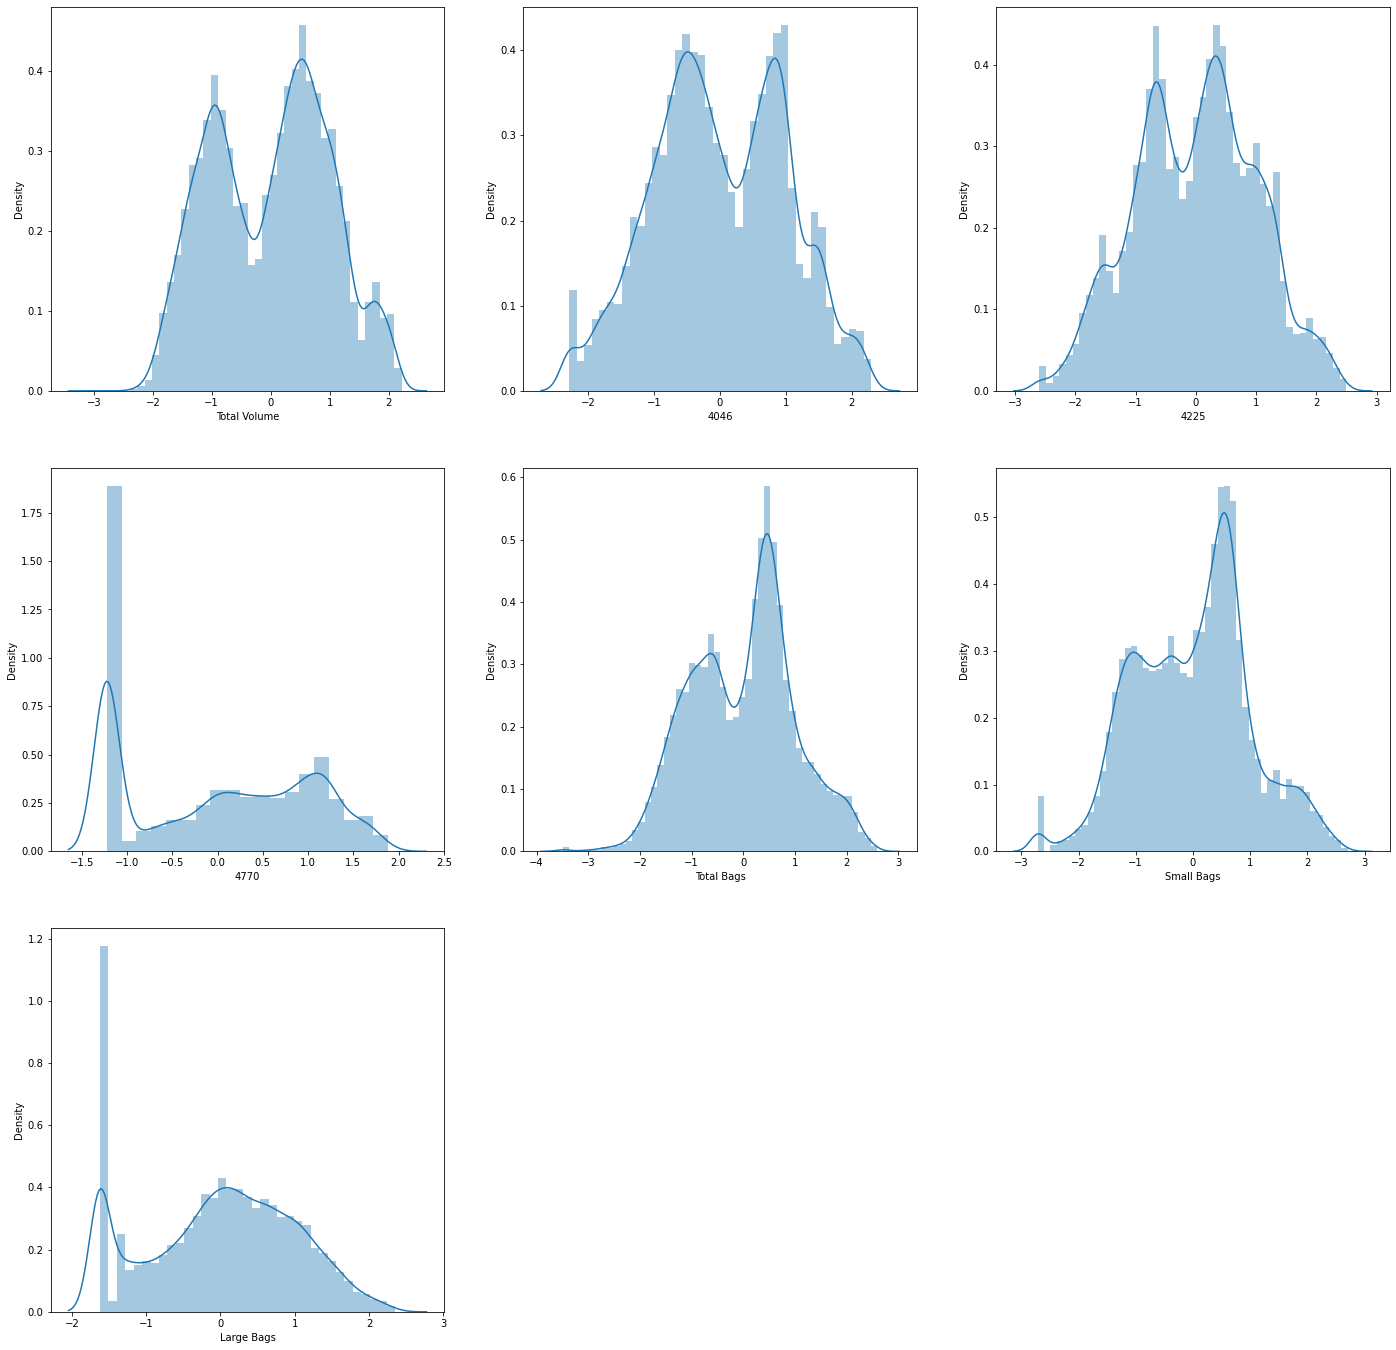

In [35]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data_reg[col])
    plotnumber+=1

<strong>Selecting KBest Features were for the regression Problem. We need to do a few more steps from classification Problem</strong>

In [36]:
data_cla = data_new
data_cla['AveragePrice'] = power_transform(np.array(data_cla['AveragePrice']).reshape(-1,1), method='yeo-johnson').reshape(17782,)

In [37]:
data_cla.skew()

AveragePrice    0.004164047
Total Volume   -0.006808978
4046           -0.038258671
4225           -0.043245586
4770            0.028014717
Total Bags     -0.021531268
Small Bags     -0.024656983
Large Bags     -0.110061419
XLarge Bags     0.860602861
year            0.220791501
dtype: float64

In [38]:
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'AveragePrice']
sc = StandardScaler()

for col in num_cols:
    data_cla[col] = sc.fit_transform(np.array(data_cla[col]).reshape(-1,1)).reshape(17782,)
    
data_cla.mean()

AveragePrice     -0.000000000
Total Volume      0.000000000
4046              0.000000000
4225             -0.000000000
4770              0.000000000
Total Bags        0.000000000
Small Bags       -0.000000000
Large Bags       -0.000000000
XLarge Bags       0.000000000
year           2016.141097739
dtype: float64

In [39]:
data_cla = data_cla.astype({'year':'str'})

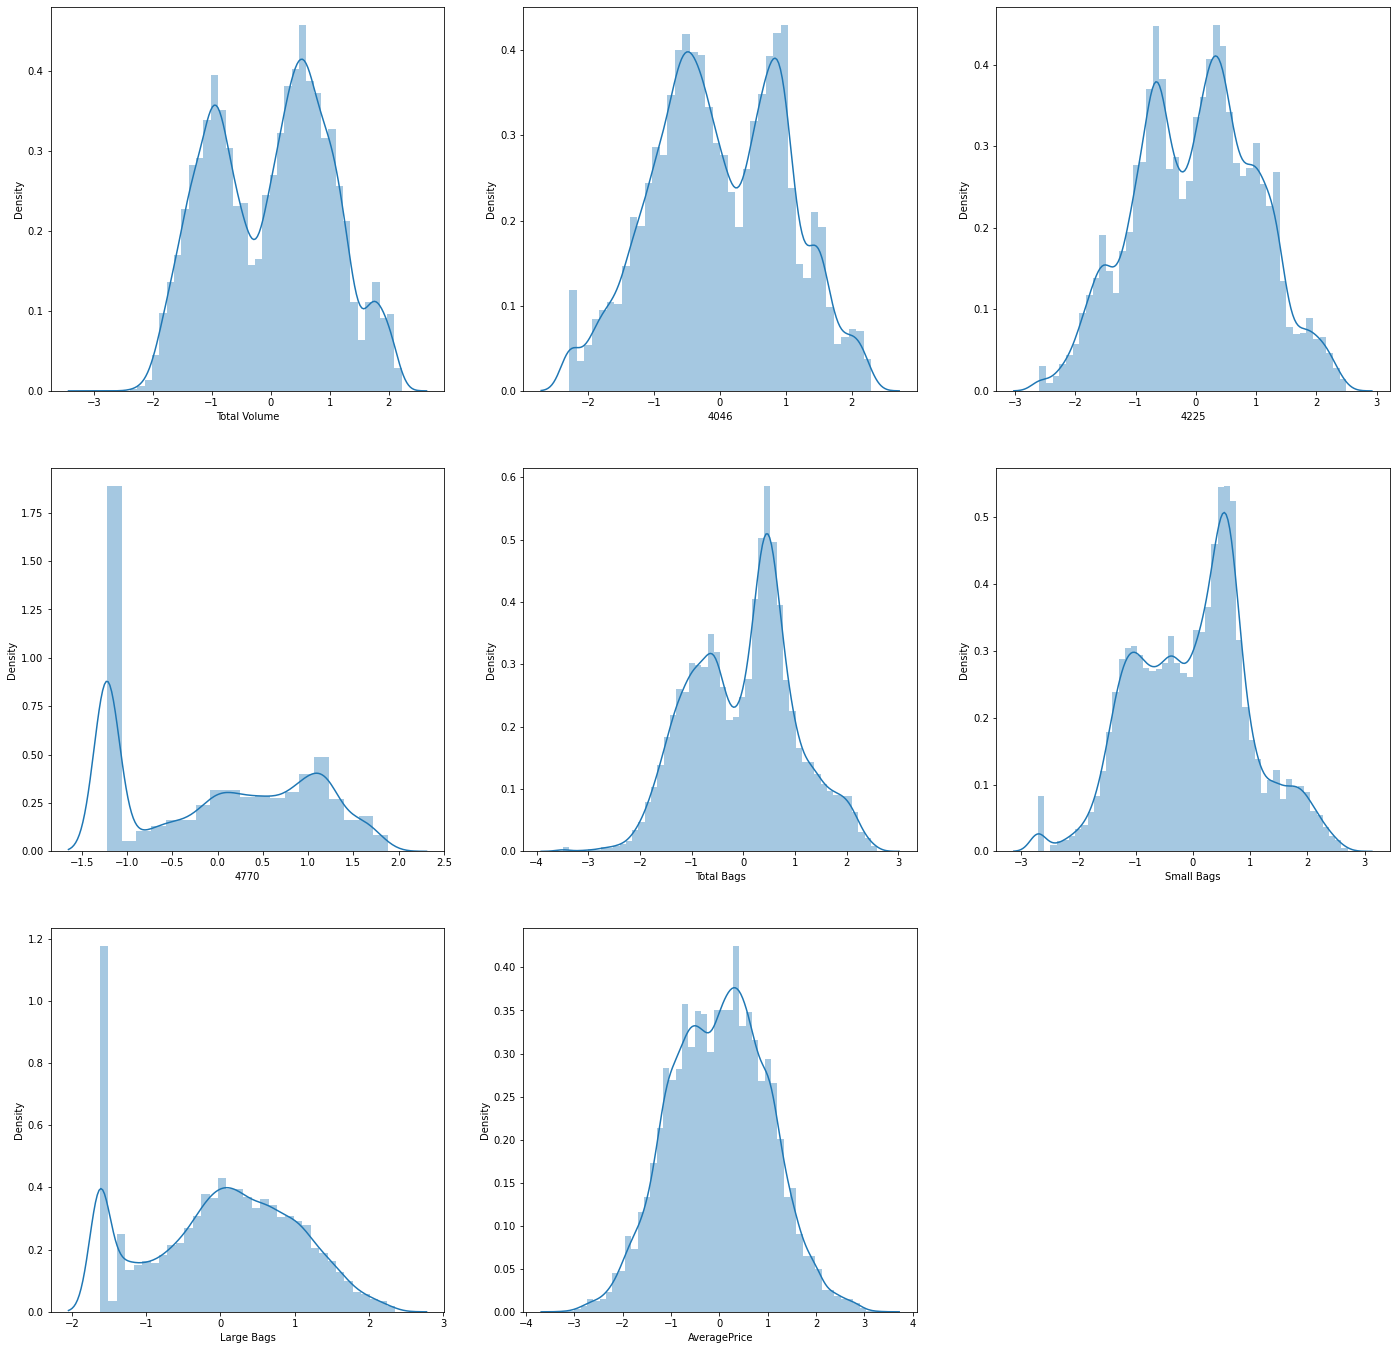

In [40]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    plt.subplot(3,3, plotnumber)
    sns.distplot(data_cla[col])
    plotnumber+=1

<h4>Encoding using getDummies</h4>

In [41]:
X_reg = data_reg.drop(columns=['AveragePrice'])
y_reg = data_reg.AveragePrice

X_clas = data_cla.drop(columns=['region'])
y_clas = data_cla.region

In [42]:
X_reg = pd.get_dummies(X_reg)
X_clas = pd.get_dummies(X_clas)

In [43]:
X_reg

Total Volume         4046         4225         4770   Total Bags  \
0      -0.065093898 -0.649917521  0.358278355 -0.212549773 -0.527444539   
1      -0.137268607 -0.770066827  0.276355255 -0.165116835 -0.488204705   
2       0.215502564 -0.724507583  0.656009648  0.034215073 -0.556203741   
3       0.029840258 -0.625016742  0.475615438 -0.110976351 -0.702369866   
4      -0.170455752 -0.677083127  0.268966363 -0.100289306 -0.675712185   
...             ...          ...          ...          ...          ...   
18244  -0.668930968 -0.454078145 -0.922232349 -1.224990368 -0.331042060   
18245  -0.762380190 -0.610402783 -0.665648579 -1.224990368 -0.499549696   
18246  -0.766343797 -0.610350220 -0.774395015  0.455354666 -0.493423634   
18247  -0.692594916 -0.539210735 -0.711604797  0.455044637 -0.424475204   
18248  -0.658062047 -0.351503390 -0.787208809  0.168008149 -0.383675893   

        Small Bags   Large Bags  type_conventional  type_organic  year_2015  \
0     -0.337064139 -0.775213563                  1             0          1   
1     -0.301037914 -0.765236643                  1             0          1   
2     -0.364043805 -0.752533590                  1             0          1   
3     -0.500341315 -0.693012438                  1             0          1   
4     -0.479918481 -0.600755452                  1             0          1   
...            ...          ...                ...           ...        ...   
18244 -0.165765370 -0.405895253                  0             1          0   
18245 -0.321644850 -0.478555730                  0             1          0   
18246 -0.303466121 -0.945246347                  0             1          0   
18247 -0.240252100 -0.910471024                  0             1          0   
18248 -0.201684698 -1.042929750                  0             1          0   

       ...  region_SouthCarolina  region_SouthCentral  region_Southeast  \
0      ...                     0                    0                 0   
1      ...                     0                    0                 0   
2      ...                     0                    0                 0   
3      ...                     0                    0                 0   
4      ...                     0                    0                 0   
...    ...                   ...                  ...               ...   
18244  ...                     0                    0                 0   
18245  ...                     0                    0                 0   
18246  ...                     0                    0                 0   
18247  ...                     0                    0                 0   
18248  ...                     0                    0                 0   

       region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0                   0               0                0             0   
1                   0               0                0             0   
2                   0               0                0             0   
3                   0               0                0             0   
4                   0               0                0             0   
...               ...             ...              ...           ...   
18244               0               0                0             0   
18245               0               0                0             0   
18246               0               0                0             0   
18247               0               0                0             0   
18248               0               0                0             0   

       region_TotalUS  region_West  region_WestTexNewMexico  
0                   0            0                        0  
1                   0            0                        0  
2                   0            0                        0  
3                   0            0                        0  
4                   0            0                        0  
...               .

In [44]:
X_clas

AveragePrice  Total Volume         4046         4225         4770  \
0      -0.116107597  -0.065093898 -0.649917521  0.358278355 -0.212549773   
1      -0.063730714  -0.137268607 -0.770066827  0.276355255 -0.165116835   
2      -1.300649782   0.215502564 -0.724507583  0.656009648  0.034215073   
3      -0.822900429   0.029840258 -0.625016742  0.475615438 -0.110976351   
4      -0.249571240  -0.170455752 -0.677083127  0.268966363 -0.100289306   
...             ...           ...          ...          ...          ...   
18244   0.615242484  -0.668930968 -0.454078145 -0.922232349 -1.224990368   
18245   0.792624115  -0.762380190 -0.610402783 -0.665648579 -1.224990368   
18246   1.128329297  -0.766343797 -0.610350220 -0.774395015  0.455354666   
18247   1.248179771  -0.692594916 -0.539210735 -0.711604797  0.455044637   
18248   0.592591218  -0.658062047 -0.351503390 -0.787208809  0.168008149   

        Total Bags   Small Bags   Large Bags  XLarge Bags  type_conventional  \
0     -0.527444539 -0.337064139 -0.775213563 -0.675702357                  1   
1     -0.488204705 -0.301037914 -0.765236643 -0.675702357                  1   
2     -0.556203741 -0.364043805 -0.752533590 -0.675702357                  1   
3     -0.702369866 -0.500341315 -0.693012438 -0.675702357                  1   
4     -0.675712185 -0.479918481 -0.600755452 -0.675702357                  1   
...            ...          ...          ...          ...                ...   
18244 -0.331042060 -0.165765370 -0.405895253 -0.675702357                  0   
18245 -0.499549696 -0.321644850 -0.478555730 -0.675702357                  0   
18246 -0.493423634 -0.303466121 -0.945246347 -0.675702357                  0   
18247 -0.424475204 -0.240252100 -0.910471024 -0.675702357                  0   
18248 -0.383675893 -0.201684698 -1.042929750 -0.675702357                  0   

       type_organic  year_2015  year_2016  year_2017  year_2018  
0                 0          1          0          0          0  
1                 0          1          0          0          0  
2                 0          1          0          0          0  
3                 0          1          0          0          0  
4                 0          1          0          0          0  
...             ...        ...        ...        ...        ...  
18244             1          0          0          0          1  
18245             1          0          0          0          1  
18246             1          0          0          0          1  
18247             1          0          0          0          1  
18248             1          0          0          0          1  

[17782 rows x 15 columns]

<h4>Checking for multicollinearity using VIF</h4>

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'AveragePrice']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_clas[num_cols].values, i) for i in range(X_clas[num_cols].shape[1])]
vif["Features"] = X_clas[num_cols].columns
vif.nlargest(n=9, columns='vif')

vif      Features
0 51.386448485  Total Volume
4 33.504655237    Total Bags
5 17.120062572    Small Bags
2 11.903210678          4225
1  6.686429069          4046
6  3.430955630    Large Bags
3  3.316262269          4770
7  1.779181086  AveragePrice

<strong>As we can see there is a mutlicollinearity problem in our data</strong>

In [46]:
X_clas = X_clas.drop(columns=['Total Volume'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'AveragePrice']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_clas[num_cols].values, i) for i in range(X_clas[num_cols].shape[1])]
vif["Features"] = X_clas[num_cols].columns
vif.nlargest(n=9, columns='vif')

vif      Features
3 25.364403268    Total Bags
4 17.088091128    Small Bags
1  4.127600803          4225
0  3.468913058          4046
5  3.372073672    Large Bags
2  3.316093117          4770
6  1.674484276  AveragePrice

In [47]:
X_clas = X_clas.drop(columns=['Total Bags'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['4046','4225', '4770' , 'Small Bags', 'Large Bags', 'AveragePrice']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_clas[num_cols].values, i) for i in range(X_clas[num_cols].shape[1])]
vif["Features"] = X_clas[num_cols].columns
vif.nlargest(n=9, columns='vif')

vif      Features
1 3.963158377          4225
0 3.468911826          4046
3 3.465581855    Small Bags
2 3.304949914          4770
4 1.811906312    Large Bags
5 1.585823246  AveragePrice

<strong>no multicollinearuty problem in calssification dataset</strong>

<h4>Multicollinearity on Regression Dataset</h4>

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols].values, i) for i in range(X_reg[num_cols].shape[1])]
vif["Features"] = X_reg[num_cols].columns
vif.nlargest(n=9, columns='vif')

vif      Features
0 48.362586959  Total Volume
4 33.317898033    Total Bags
5 16.520572247    Small Bags
2 10.981051124          4225
1  6.686207519          4046
6  3.428774751    Large Bags
3  3.251730176          4770

In [49]:
X_reg = X_reg.drop(columns=['Total Volume'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols].values, i) for i in range(X_reg[num_cols].shape[1])]
vif["Features"] = X_reg[num_cols].columns
vif.nlargest(n=9, columns='vif')

vif    Features
3 24.021402223  Total Bags
4 16.520485858  Small Bags
1  4.041986392        4225
5  3.371916462  Large Bags
0  3.281266368        4046
2  3.249218741        4770

In [50]:
X_reg = X_reg.drop(columns=['Total Bags'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['4046','4225', '4770' , 'Small Bags', 'Large Bags']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols].values, i) for i in range(X_reg[num_cols].shape[1])]
vif["Features"] = X_reg[num_cols].columns
vif.nlargest(n=9, columns='vif')

vif    Features
1 3.921222048        4225
3 3.455872680  Small Bags
0 3.271007656        4046
2 3.246978989        4770
4 1.732124076  Large Bags

<strong>Both our datsets are free from mutlicollinearity</strong>

<h3>Building and Training Models</h3>

<h4>For Regression Problem</h4>

In [132]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14225, 65)
(3557, 65)
(14225,)
(3557,)


In [135]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<h4>Linear Regression</h4>

Corss Validation Score Mean===> 0.6162487933644731
________________________________
Training R2 Score : 0.6196886440515912
Training MSE      : 0.06156612241987198
Training MAE      : 0.18460358696855436
Training RMSE     : 0.24812521520367892
________________________________
Testing R2 Score : 0.619627176087813
Testing MSE      : 0.06144959037816232
Testing MAE      : 0.18373359407774006
Testing RMSE     : 0.2478902789101709


Text(0.5, 1.0, 'Training Data')

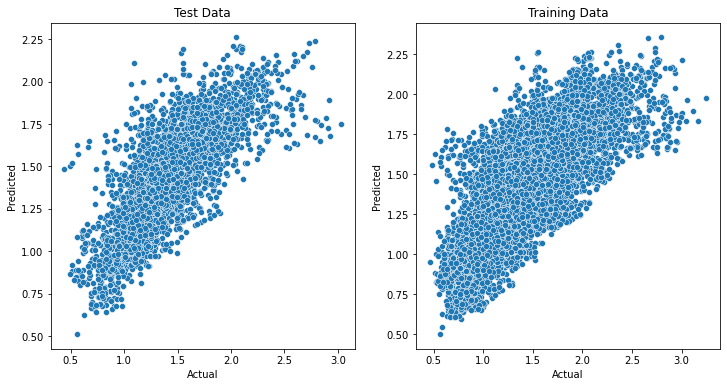

In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print("Corss Validation Score Mean===>", cross_val_score(lr, X_train, y_train, cv=5).mean())
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [141]:
lrcv = LinearRegression()


grid_parmas = {
    'fit_intercept':[True, False],
    'positive':[True, False]
}
grid_lr = GridSearchCV(lrcv, param_grid = grid_parmas, cv=3)
grid_lr.fit(X_train, y_train)

print('Best Score: --> ', grid_lr.best_score_)
print('Best params: -->', grid_lr.best_params_)

Best Score: -->  0.6163123403156611
Best params: --> {'fit_intercept': True, 'positive': False}


Building Model with best params

Corss Validation Score Mean===> 0.6162487933644731
________________________________
Training R2 Score : 0.6196886440515912
Training MSE      : 0.06156612241987198
Training MAE      : 0.18460358696855436
Training RMSE     : 0.24812521520367892
________________________________
Testing R2 Score : 0.619627176087813
Testing MSE      : 0.06144959037816232
Testing MAE      : 0.18373359407774006
Testing RMSE     : 0.2478902789101709


Text(0.5, 1.0, 'Training Data')

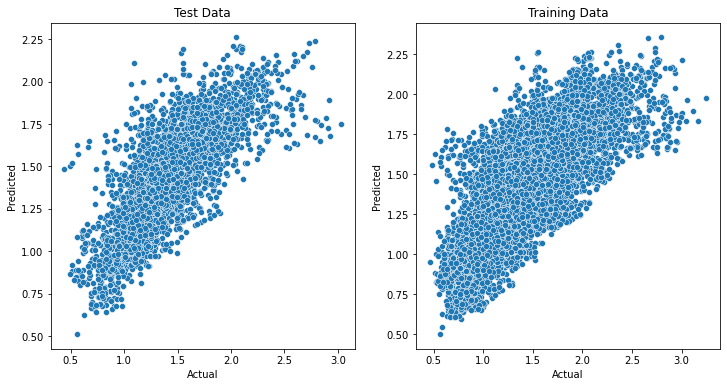

In [142]:
lrcv = LinearRegression(fit_intercept=True, positive=False)
print("Corss Validation Score Mean===>", cross_val_score(lrcv, X_train, y_train, cv=5).mean())
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lrcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>KNeighbors regressor</h4>

Corss Validation Score Mean===> 0.8352212272075666
________________________________
Training R2 Score : 0.9053919953177201
Training MSE      : 0.015315472196836556
Training MAE      : 0.08528759226713532
Training RMSE     : 0.12375569561372339
________________________________
Testing R2 Score : 0.8575365813707722
Testing MSE      : 0.023015100365476524
Testing MAE      : 0.10678661793646332
Testing RMSE     : 0.1517072851430561


Text(0.5, 1.0, 'Training Data')

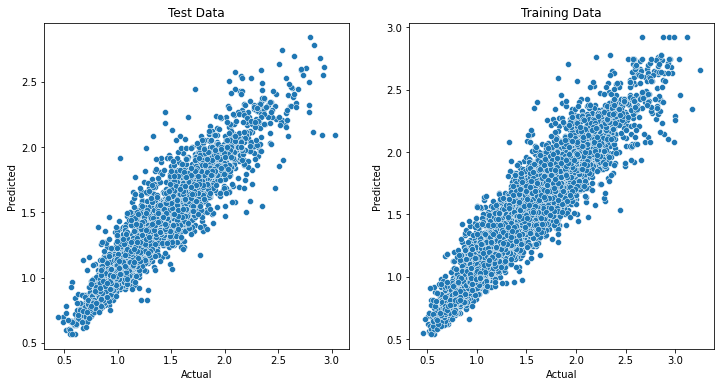

In [143]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print("Corss Validation Score Mean===>", cross_val_score(knn, X_train, y_train, cv=5).mean())
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knn.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>Hyperparameter tuning</h4>

In [145]:
knncv = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[3,4,5,6,7],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(knncv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_knn.fit(X_train, y_train)

print('Best Score: --> ', grid_knn.best_score_)
print('Best params: -->', grid_knn.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Score: -->  0.8438168744240021
Best params: --> {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


Building Model with best Params

Corss Validation Score Mean===> 0.8544180287672345
________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : 0.8707380001547563
Testing MSE      : 0.02088239864314294
Testing MAE      : 0.10035215883661609
Testing RMSE     : 0.1445074345601047


Text(0.5, 1.0, 'Training Data')

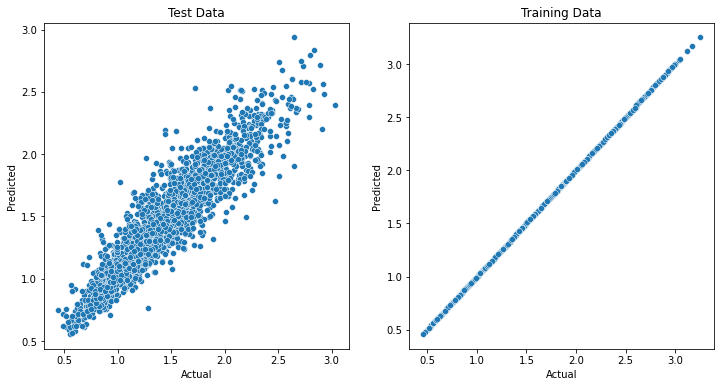

In [146]:
knncv = KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')
print("Corss Validation Score Mean===>", cross_val_score(knncv, X_train, y_train, cv=5).mean())
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knncv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is better than LinearRegression model as it gives better accuracy. It has slightly more difference between cvscore and testing score , but it is way more accurate than LinearRegression</strong>

<h4>RandomForest Regressor</h4>

Corss Validation Score Mean===> 0.8472519810797667
________________________________
Training R2 Score : 0.980019004580479
Training MSE      : 0.0032345928956063275
Training MAE      : 0.039378966608084355
Training RMSE     : 0.05687348147956416
________________________________
Testing R2 Score : 0.8618030796343242
Testing MSE      : 0.022325843525442795
Testing MAE      : 0.10597351700871521
Testing RMSE     : 0.14941835069844264


Text(0.5, 1.0, 'Training Data')

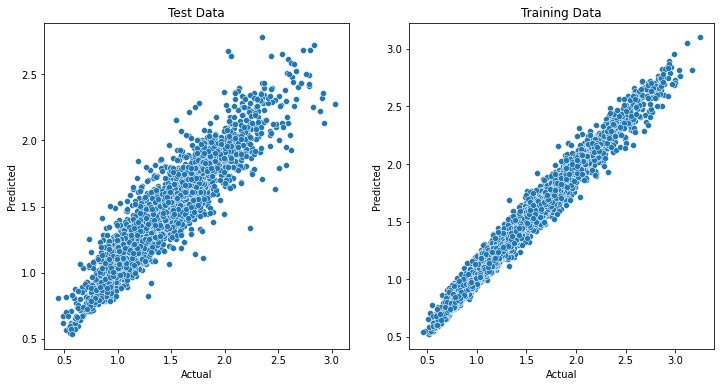

In [147]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

print("Corss Validation Score Mean===>", cross_val_score(rf, X_train, y_train, cv=5).mean())
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = rf.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [151]:
rfcv = RandomForestRegressor()

grid_param = {
    'n_estimators': [50,80,100,120],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[5,6],
    'max_leaf_nodes':[80,100,120]
}

grid_rf = GridSearchCV(rf, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score: --> ', grid_rf.best_score_)
print('Best params: -->', grid_rf.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Score: -->  0.721781403755469
Best params: --> {'max_leaf_nodes': 120, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 120}


Building model with best parameters

Corss Validation Score Mean===> 0.7249310055158696
________________________________
Training R2 Score : 0.7634531151785975
Training MSE      : 0.038293030805342056
Training MAE      : 0.14968228494029504
Training RMSE     : 0.19568605163716205
________________________________
Testing R2 Score : 0.7307182612389126
Testing MSE      : 0.04350272023378895
Testing MAE      : 0.1578984179402807
Testing RMSE     : 0.20857305730556128


Text(0.5, 1.0, 'Training Data')

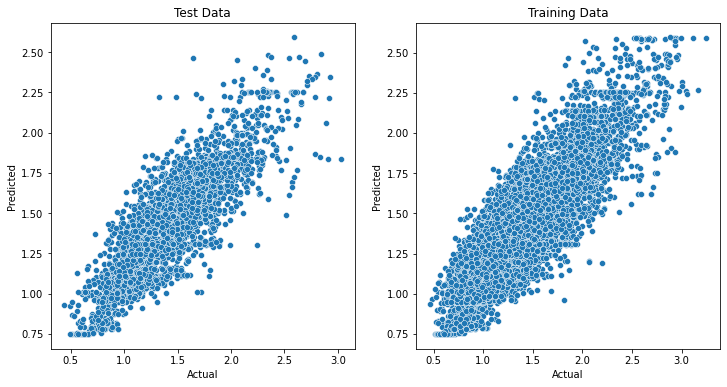

In [153]:
rfcv = RandomForestRegressor(max_leaf_nodes=120, min_samples_leaf=5, min_samples_split=2,n_estimators=120)
print("Corss Validation Score Mean===>", cross_val_score(rfcv, X_train, y_train, cv=5).mean())
rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = rfcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>KNN Model was perfomring better than this in terms of r2score, but it was overfitting on training data and the difference between cvscore and testing score is also less than what was in knn. So overall this model is better than KNN</strong>

<h4>AdaBoost Regressor</h4>

Corss Validation Score Mean===> 0.47290979604280164
________________________________
Training R2 Score : 0.47558709729140425
Training MSE      : 0.08489378100794231
Training MAE      : 0.23332663479967475
Training RMSE     : 0.2913653737284894
________________________________
Testing R2 Score : 0.47441522373175193
Testing MSE      : 0.08490871897340917
Testing MAE      : 0.23307893215335296
Testing RMSE     : 0.29139100702219545


Text(0.5, 1.0, 'Training Data')

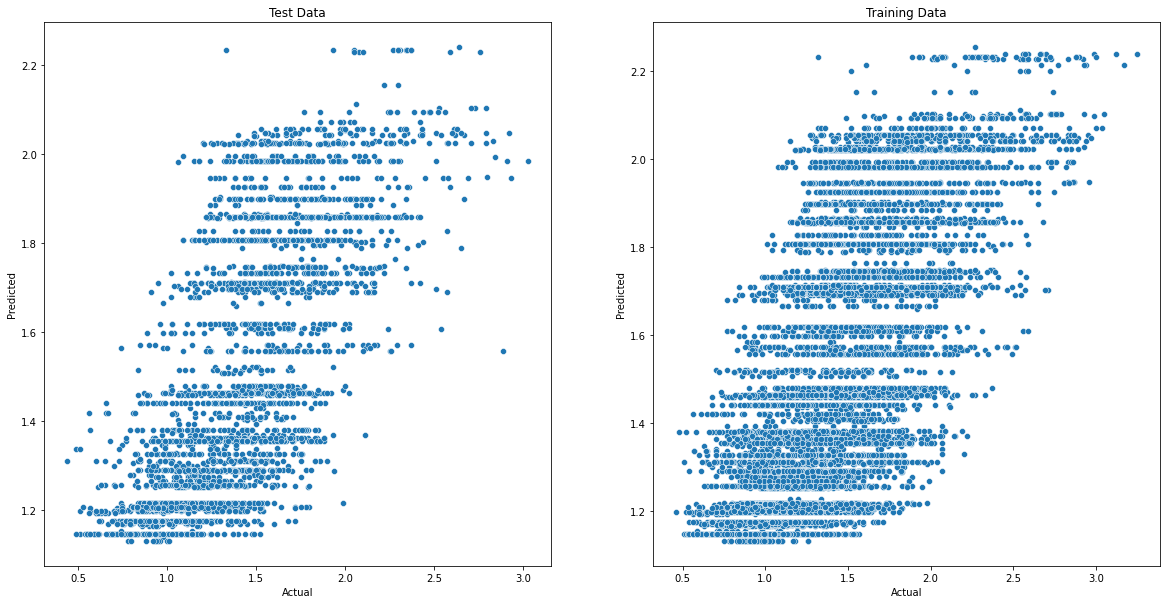

In [154]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()
print("Corss Validation Score Mean===>", cross_val_score(ad, X_train, y_train, cv=5).mean())
ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = ad.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>Hyperparameter Tuning</h4>

In [157]:
adacv = AdaBoostRegressor()

param_grid ={
    'n_estimators':[100,130,150,170,190,200],
    'learning_rate':[0.01,0.05,0.1,0.3,0.5]
}

grid_ad  = GridSearchCV(adacv, param_grid= param_grid, cv=3, n_jobs=-1, verbose=3)
grid_ad.fit(X_train, y_train)

print('Best Score: --> ', grid_ad.best_score_)
print('Best params: -->', grid_ad.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Score: -->  0.509797202930876
Best params: --> {'learning_rate': 0.1, 'n_estimators': 150}


Building model with best Parameters

Corss Validation Score Mean===> 0.5110072227797277
________________________________
Training R2 Score : 0.5126716567533098
Training MSE      : 0.07889040379606535
Training MAE      : 0.2222153518850237
Training RMSE     : 0.2808743558890084
________________________________
Testing R2 Score : 0.5104835972663673
Testing MSE      : 0.07908183902832575
Testing MAE      : 0.22208529535814284
Testing RMSE     : 0.2812149338643411


Text(0.5, 1.0, 'Training Data')

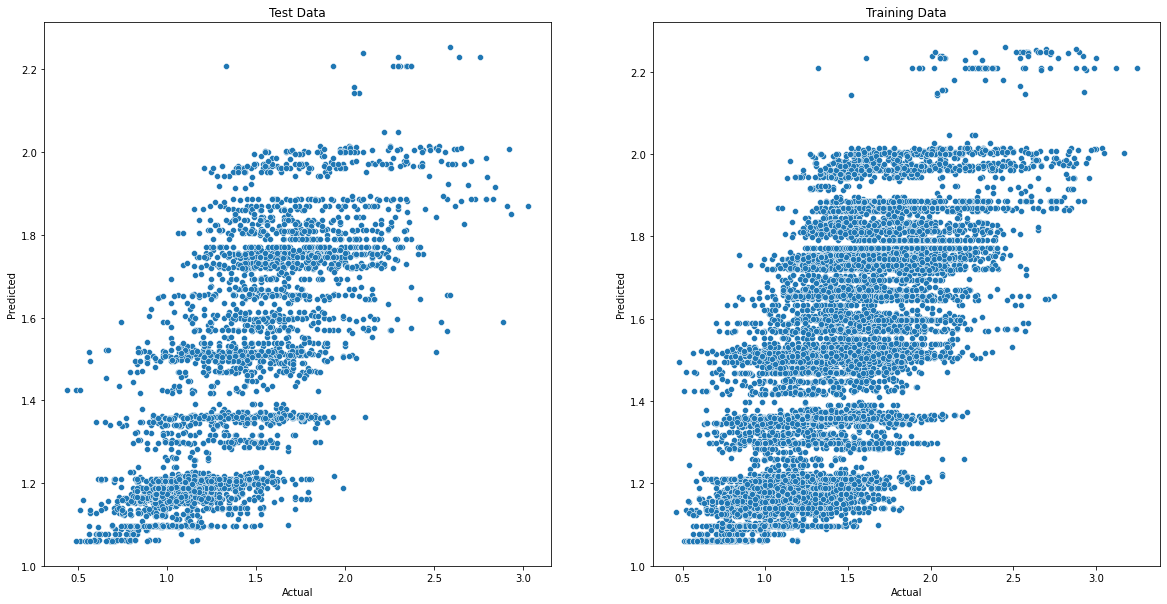

In [158]:
adacv = AdaBoostRegressor(learning_rate=0.1, n_estimators=150)
print("Corss Validation Score Mean===>", cross_val_score(adacv, X_train, y_train, cv=5).mean())
adacv.fit(X_train, y_train)

y_pred_train = adacv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = adacv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is clearly the worse perfroming until now</strong>

<h4>XGB Regressor</h4>

Corss Validation Score Mean===> 0.8317864979176053
________________________________
Training R2 Score : 0.9155955407638314
Training MSE      : 0.0136636868419516
Training MAE      : 0.08470199837089633
Training RMSE     : 0.11689177405596854
________________________________
Testing R2 Score : 0.8374162132966605
Testing MSE      : 0.02626556490628043
Testing MAE      : 0.1187166486672548
Testing RMSE     : 0.16206654468544837


Text(0.5, 1.0, 'Training Data')

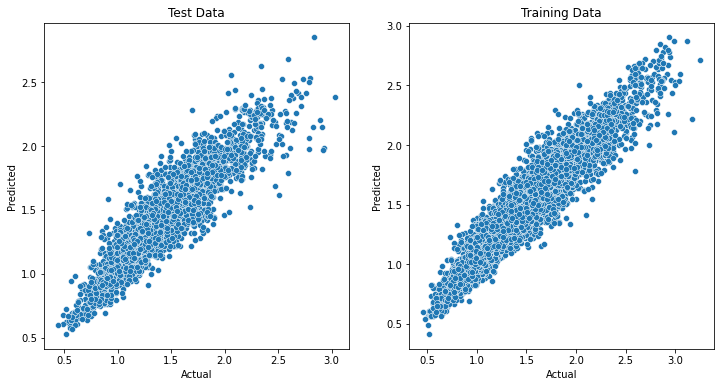

In [159]:
from xgboost import XGBRegressor

xg = XGBRegressor()

print("Corss Validation Score Mean===>", cross_val_score(xg, X_train, y_train, cv=5).mean())
xg.fit(X_train, y_train)

y_pred_train = xg.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xg.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [161]:
xgcv = XGBRegressor()

grid_params = {
    'n_estimators':[200,250,300,400,500,600],
    'max_depth':[3,4,5,6,7,8],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'n_jobs':[-1]
}

grid_xg = GridSearchCV(xg, param_grid=grid_params, cv=3, n_jobs=-1, verbose=3)
grid_xg.fit(X_train, y_train)
print('Best Score: --> ', grid_xg.best_score_)
print('Best params: -->', grid_xg.best_params_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best Score: -->  0.8515132245525798
Best params: --> {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600, 'n_jobs': -1}


Building model with best parameters

Corss Validation Score Mean===> 0.8625205250872983
________________________________
Training R2 Score : 0.9859099283782098
Training MSE      : 0.002280949702931233
Training MAE      : 0.033037037669585746
Training RMSE     : 0.047759289179501334
________________________________
Testing R2 Score : 0.8725157066633049
Testing MSE      : 0.02059520847103926
Testing MAE      : 0.10202378857494372
Testing RMSE     : 0.14351030789124264


Text(0.5, 1.0, 'Training Data')

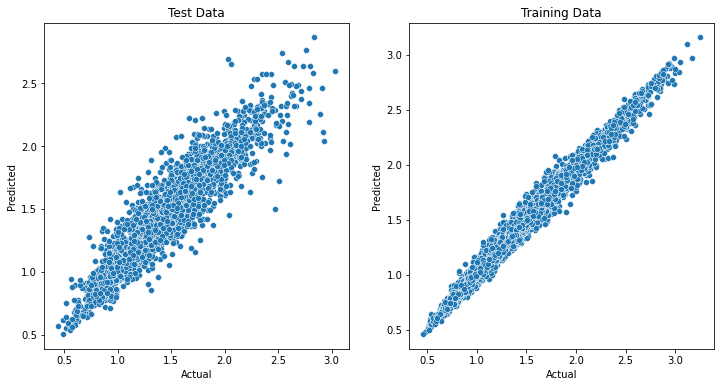

In [162]:
xgcv = XGBRegressor(learning_rate=0.1, max_depth=8, n_estimators=600, n_jobs=-1)

print("Corss Validation Score Mean===>", cross_val_score(xgcv, X_train, y_train, cv=5).mean())
xgcv.fit(X_train, y_train)

y_pred_train = xgcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xgcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is the best performing as the cross val score is close to testing and the model performs really well on the testing data</strong>

<h4>Model Saving</h4>

In [164]:
import pickle
filename = 'final_model_regresion.pickle'
pickle.dump(xgcv, open(filename, 'wb'))

<h3>Building and Trainign Models for Classification Problem</h3>

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report, confusion_matrix, roc_auc_score, roc_curve
X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.2)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14225, 13)
(3557, 13)
(14225,)
(3557,)


<h4>Logistic Regression</h4>

In [168]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.4971528998242531
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       0.61      0.53      0.57       298
            Atlanta       0.38      0.21      0.28       498
BaltimoreWashington       0.58      0.61      0.59       249
              Boise       0.43      0.53      0.47       219
             Boston       0.47      0.51      0.49       255
   BuffaloRochester       0.38      0.49      0.43       199
         California       0.85      0.78      0.82       248
          Charlotte       0.69      0.59      0.63       312
            Chicago       0.73      0.60      0.66       328
   CincinnatiDayton       0.78      0.52      0.63       401
           Columbus       0.37      0.61      0.46       165
      DallasFtWorth       0.57      0.53      0.55       289
             Denver       0.53      0.44      0.48       319
            Detroit       0.20      0.24      0.22       222


Text(249.0, 0.5, 'Predicted')

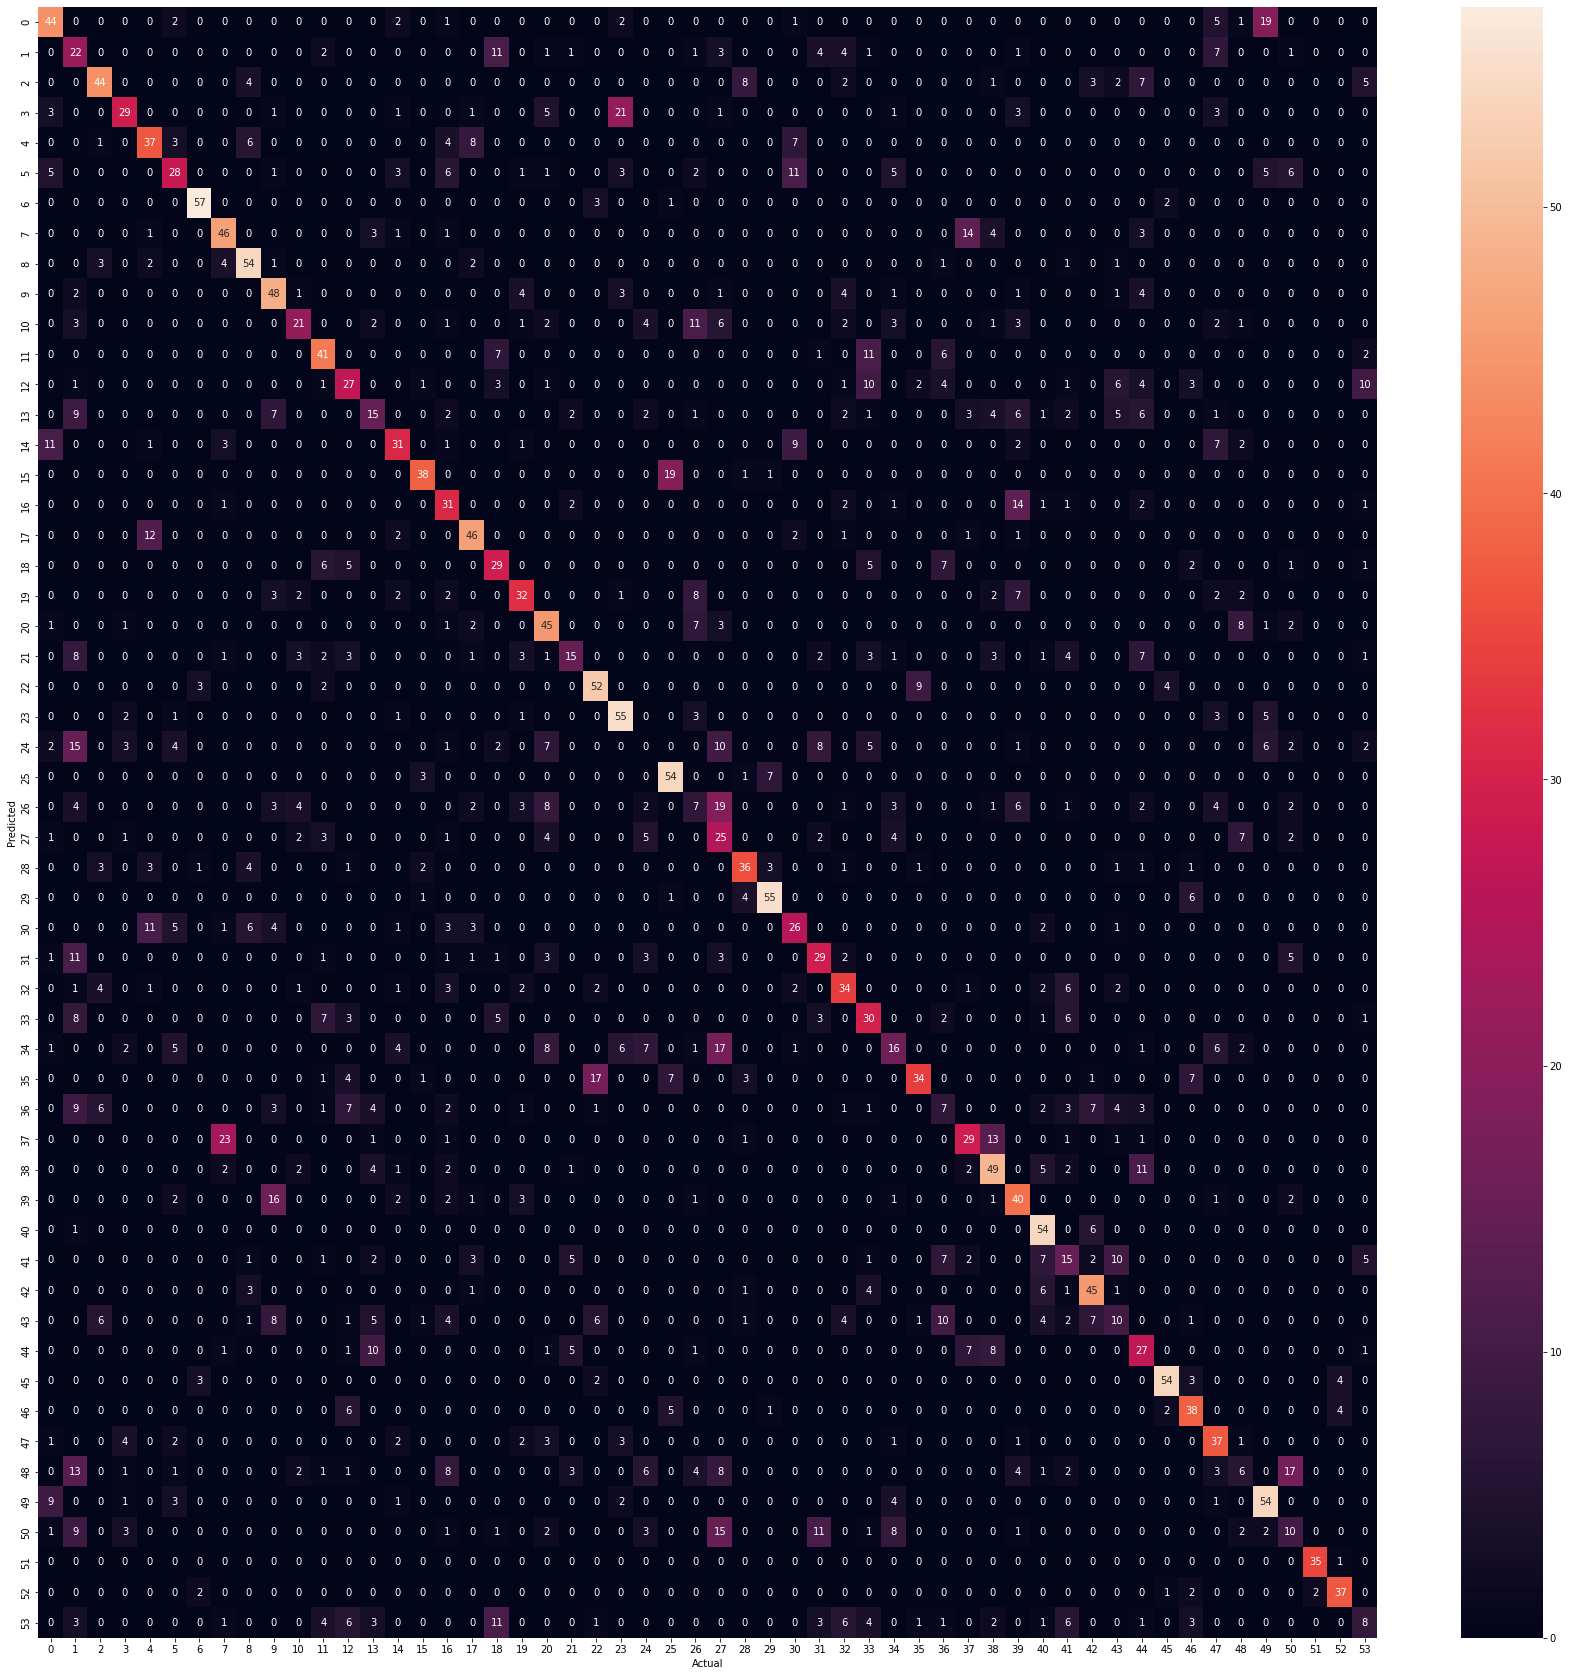

In [174]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [172]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)

print('Best Score -->', grid_lr.best_score_)
print('Best Parameters -->', grid_lr.best_params_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best Score --> 0.47268864596472654
Best Parameters --> {'dual': False, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


Building model with best parameters

In [176]:
lrcv = LogisticRegression(dual=False, penalty='l2', solver='lbfgs', max_iter=100, fit_intercept=True)
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.4971528998242531
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       0.61      0.53      0.57       298
            Atlanta       0.38      0.21      0.28       498
BaltimoreWashington       0.58      0.61      0.59       249
              Boise       0.43      0.53      0.47       219
             Boston       0.47      0.51      0.49       255
   BuffaloRochester       0.38      0.49      0.43       199
         California       0.85      0.78      0.82       248
          Charlotte       0.69      0.59      0.63       312
            Chicago       0.73      0.60      0.66       328
   CincinnatiDayton       0.78      0.52      0.63       401
           Columbus       0.37      0.61      0.46       165
      DallasFtWorth       0.57      0.53      0.55       289
             Denver       0.53      0.44      0.48       319
            Detroit       0.20      0.24      0.22       222


<h3>KNeighbors Classifier</h3>

In [177]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9046748681898067
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       0.93      0.86      0.89       282
            Atlanta       0.90      0.80      0.85       312
BaltimoreWashington       0.98      0.95      0.97       271
              Boise       0.87      0.91      0.89       258
             Boston       0.97      0.95      0.96       276
   BuffaloRochester       0.83      0.89      0.86       243
         California       0.98      0.98      0.98       227
          Charlotte       0.92      0.88      0.90       278
            Chicago       0.97      0.96      0.96       273
   CincinnatiDayton       0.88      0.87      0.87       272
           Columbus       0.84      0.80      0.82       290
      DallasFtWorth       0.98      0.91      0.94       291
             Denver       0.97      0.95      0.96       266
            Detroit       0.83      0.83      0.83       268


Text(249.0, 0.5, 'Predicted')

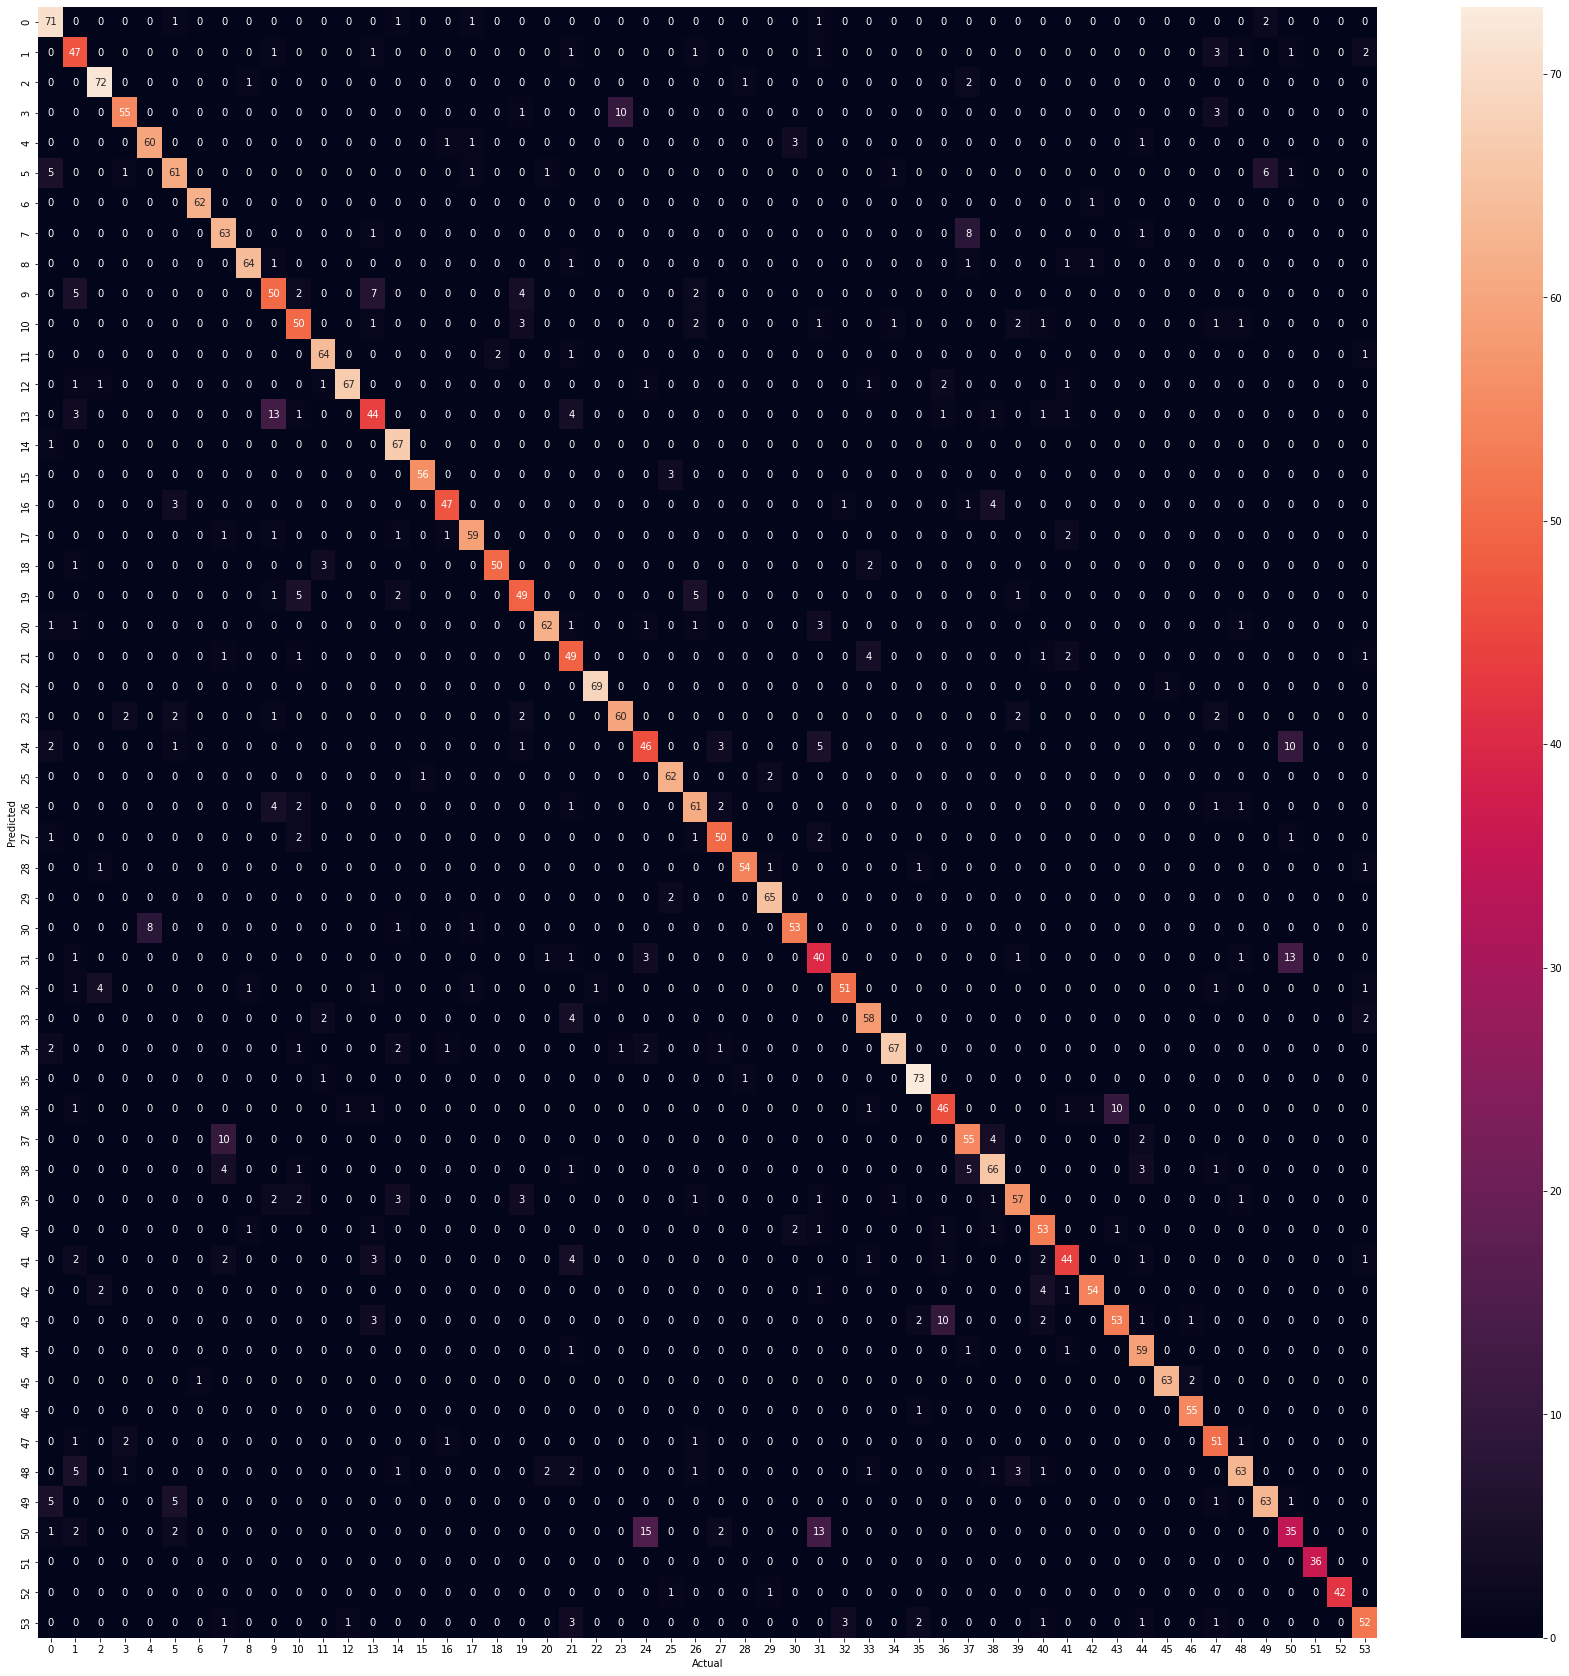

In [178]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [179]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,4,5,6,7],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(knncv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_knn.fit(X_train, y_train)

print('Best Score: --> ', grid_knn.best_score_)
print('Best params: -->', grid_knn.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Score: -->  0.8648860992375678
Best params: --> {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


Building Model with best parameters

In [180]:
knncv = KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

knncv.fit(X_train, y_train)


y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       1.00      1.00      1.00       261
            Atlanta       1.00      1.00      1.00       279
BaltimoreWashington       1.00      1.00      1.00       262
              Boise       1.00      1.00      1.00       269
             Boston       1.00      1.00      1.00       272
   BuffaloRochester       1.00      1.00      1.00       261
         California       1.00      1.00      1.00       227
          Charlotte       1.00      1.00      1.00       265
            Chicago       1.00      1.00      1.00       269
   CincinnatiDayton       1.00      1.00      1.00       268
           Columbus       1.00      1.00      1.00       275
      DallasFtWorth       1.00      1.00      1.00       270
             Denver       1.00      1.00      1.00       263
            Detroit       1.00      1.00      1.00       269
        GrandRa

Text(249.0, 0.5, 'Predicted')

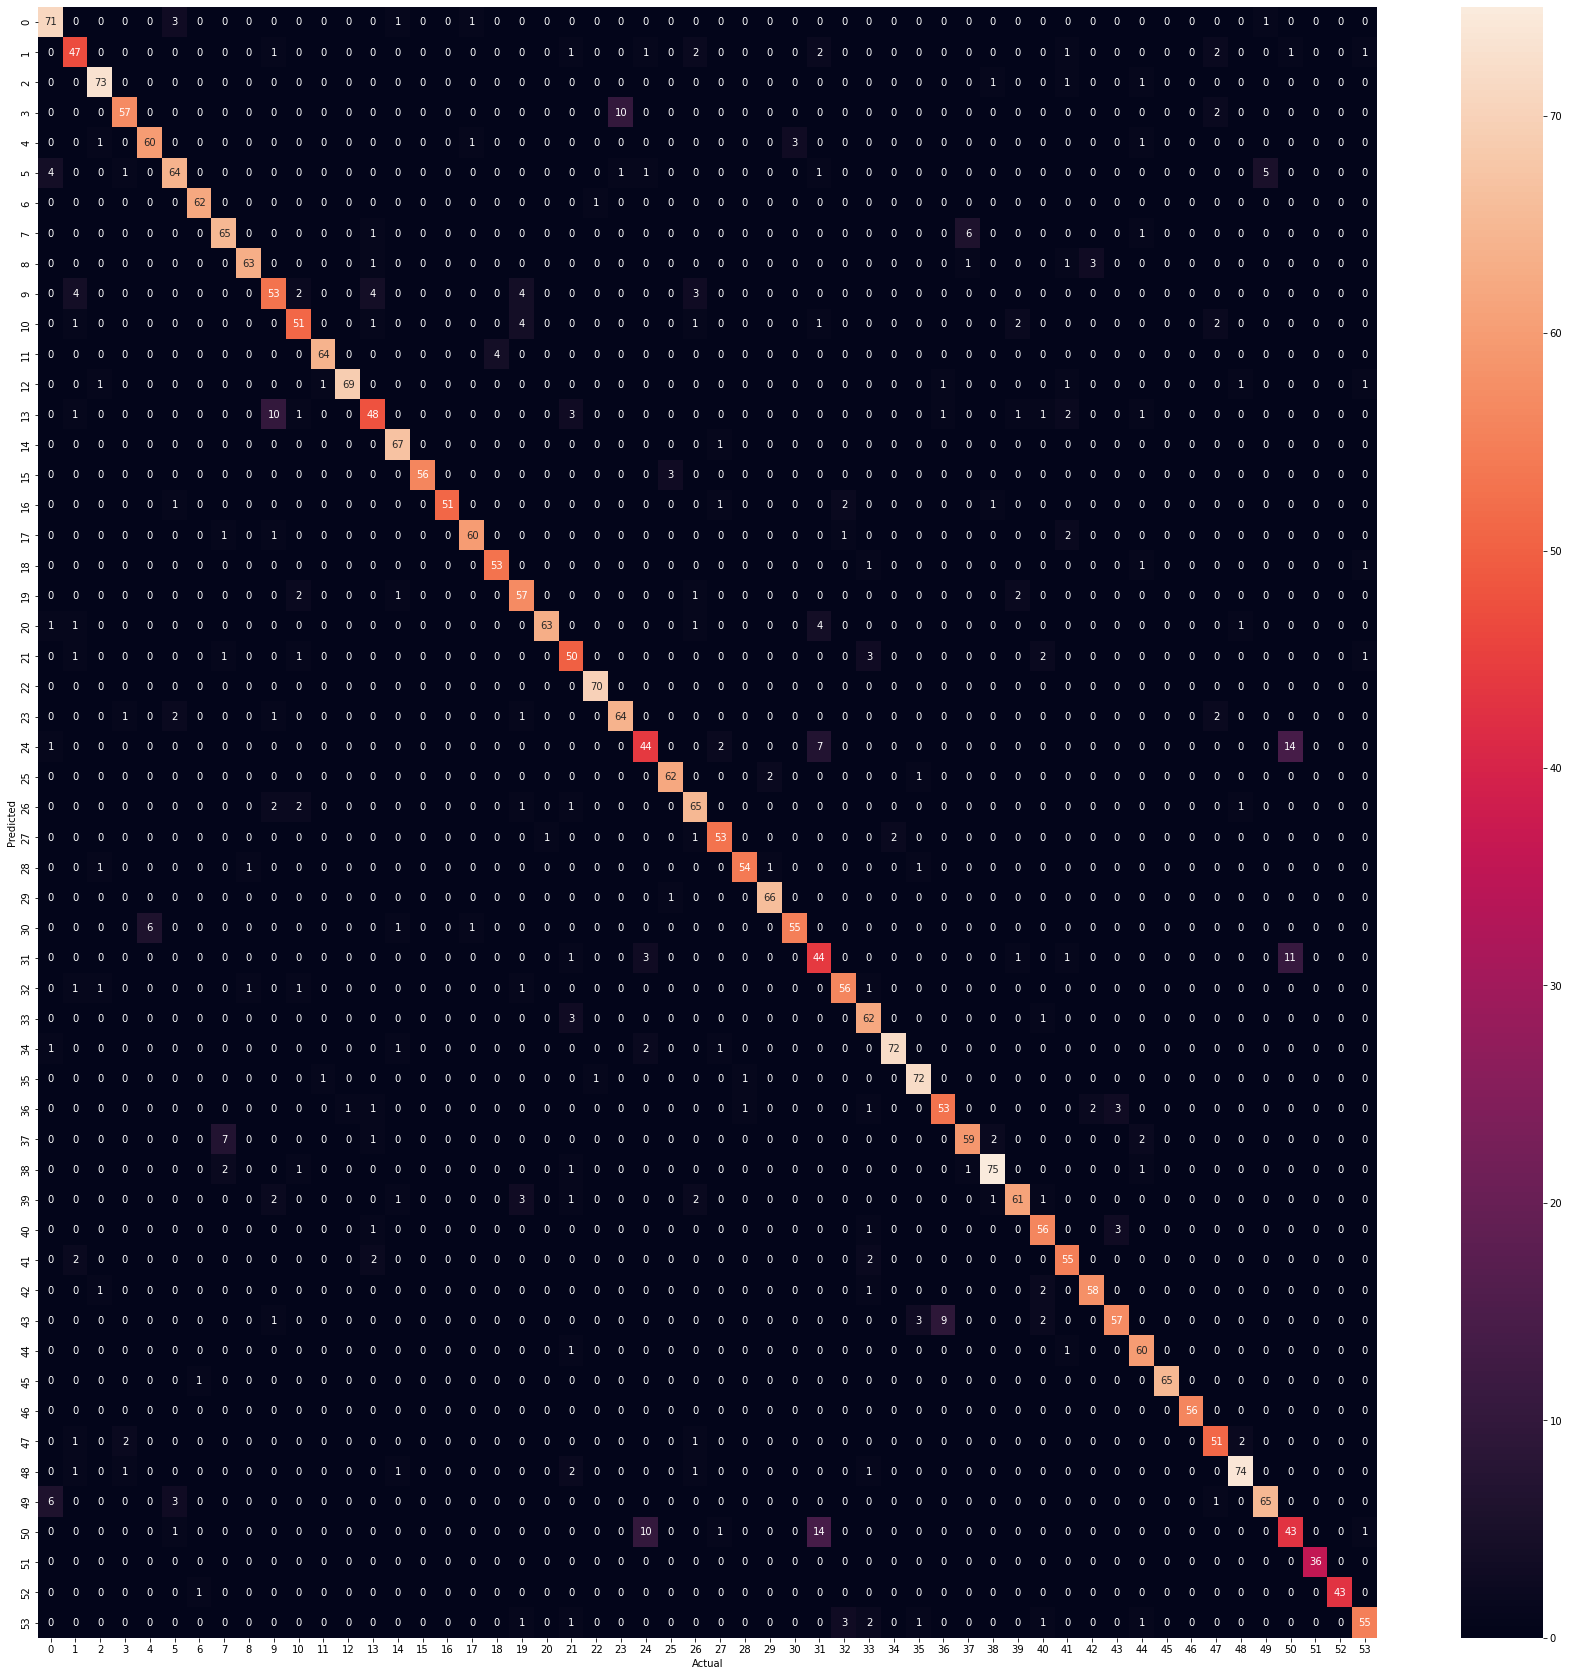

In [181]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>This model is performing better than Logistic Regression Model</strong>

<h3>DecistionTrees</h3>

In [182]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       1.00      1.00      1.00       261
            Atlanta       1.00      1.00      1.00       279
BaltimoreWashington       1.00      1.00      1.00       262
              Boise       1.00      1.00      1.00       269
             Boston       1.00      1.00      1.00       272
   BuffaloRochester       1.00      1.00      1.00       261
         California       1.00      1.00      1.00       227
          Charlotte       1.00      1.00      1.00       265
            Chicago       1.00      1.00      1.00       269
   CincinnatiDayton       1.00      1.00      1.00       268
           Columbus       1.00      1.00      1.00       275
      DallasFtWorth       1.00      1.00      1.00       270
             Denver       1.00      1.00      1.00       263
            Detroit       1.00      1.00      1.00       269
        GrandRa

Text(249.0, 0.5, 'Predicted')

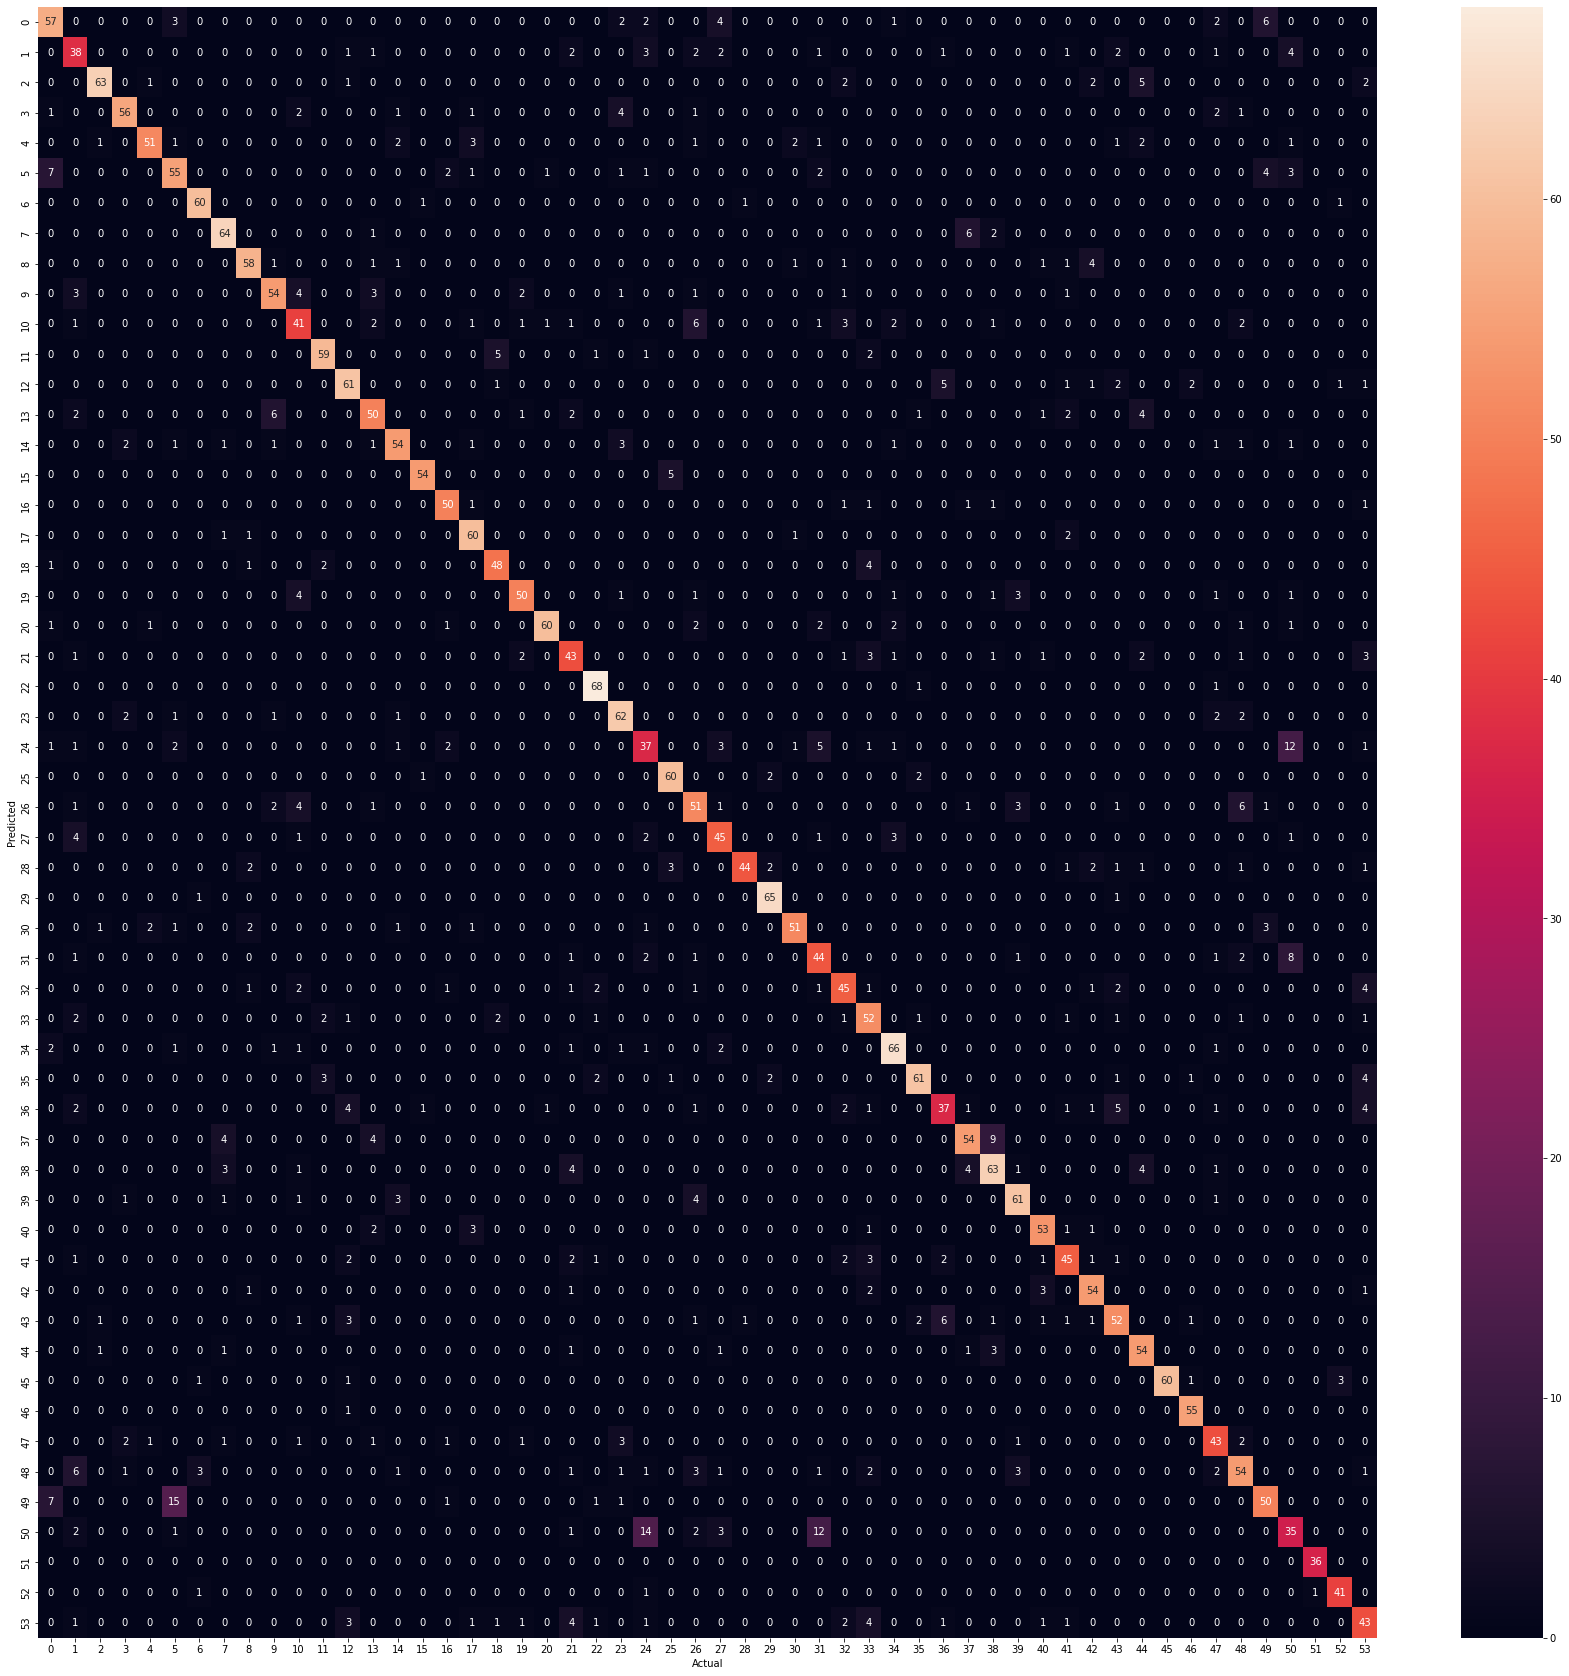

In [183]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParamter Tuning</h4>

In [189]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'max_depth':[None,16,17,18,19,20],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[3,4,5],
    'max_leaf_nodes':[None,100,120]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1, verbose=3)
grid_dt.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 16, 17, 18, 19, 20],
                         'max_leaf_nodes': [None, 100, 120],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=3)

In [190]:
print('Best Score: --> ', grid_dt.best_score_)
print('Best params: -->', grid_dt.best_params_)

Best Score: -->  0.7571178617106745
Best params: --> {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}


Building Model with best parameters

In [191]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2)
dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.932231985940246
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       0.93      0.90      0.91       271
            Atlanta       0.91      0.86      0.88       294
BaltimoreWashington       0.96      0.95      0.96       264
              Boise       0.96      0.93      0.94       280
             Boston       0.97      0.90      0.94       292
   BuffaloRochester       0.91      0.90      0.91       263
         California       0.98      0.97      0.98       229
          Charlotte       0.95      0.94      0.95       270
            Chicago       0.98      0.97      0.98       271
   CincinnatiDayton       0.93      0.93      0.93       270
           Columbus       0.90      0.89      0.89       277
      DallasFtWorth       0.97      0.91      0.94       290
             Denver       0.95      0.95      0.95       265
            Detroit       0.93      0.90      0.91       276
 

Text(249.0, 0.5, 'Predicted')

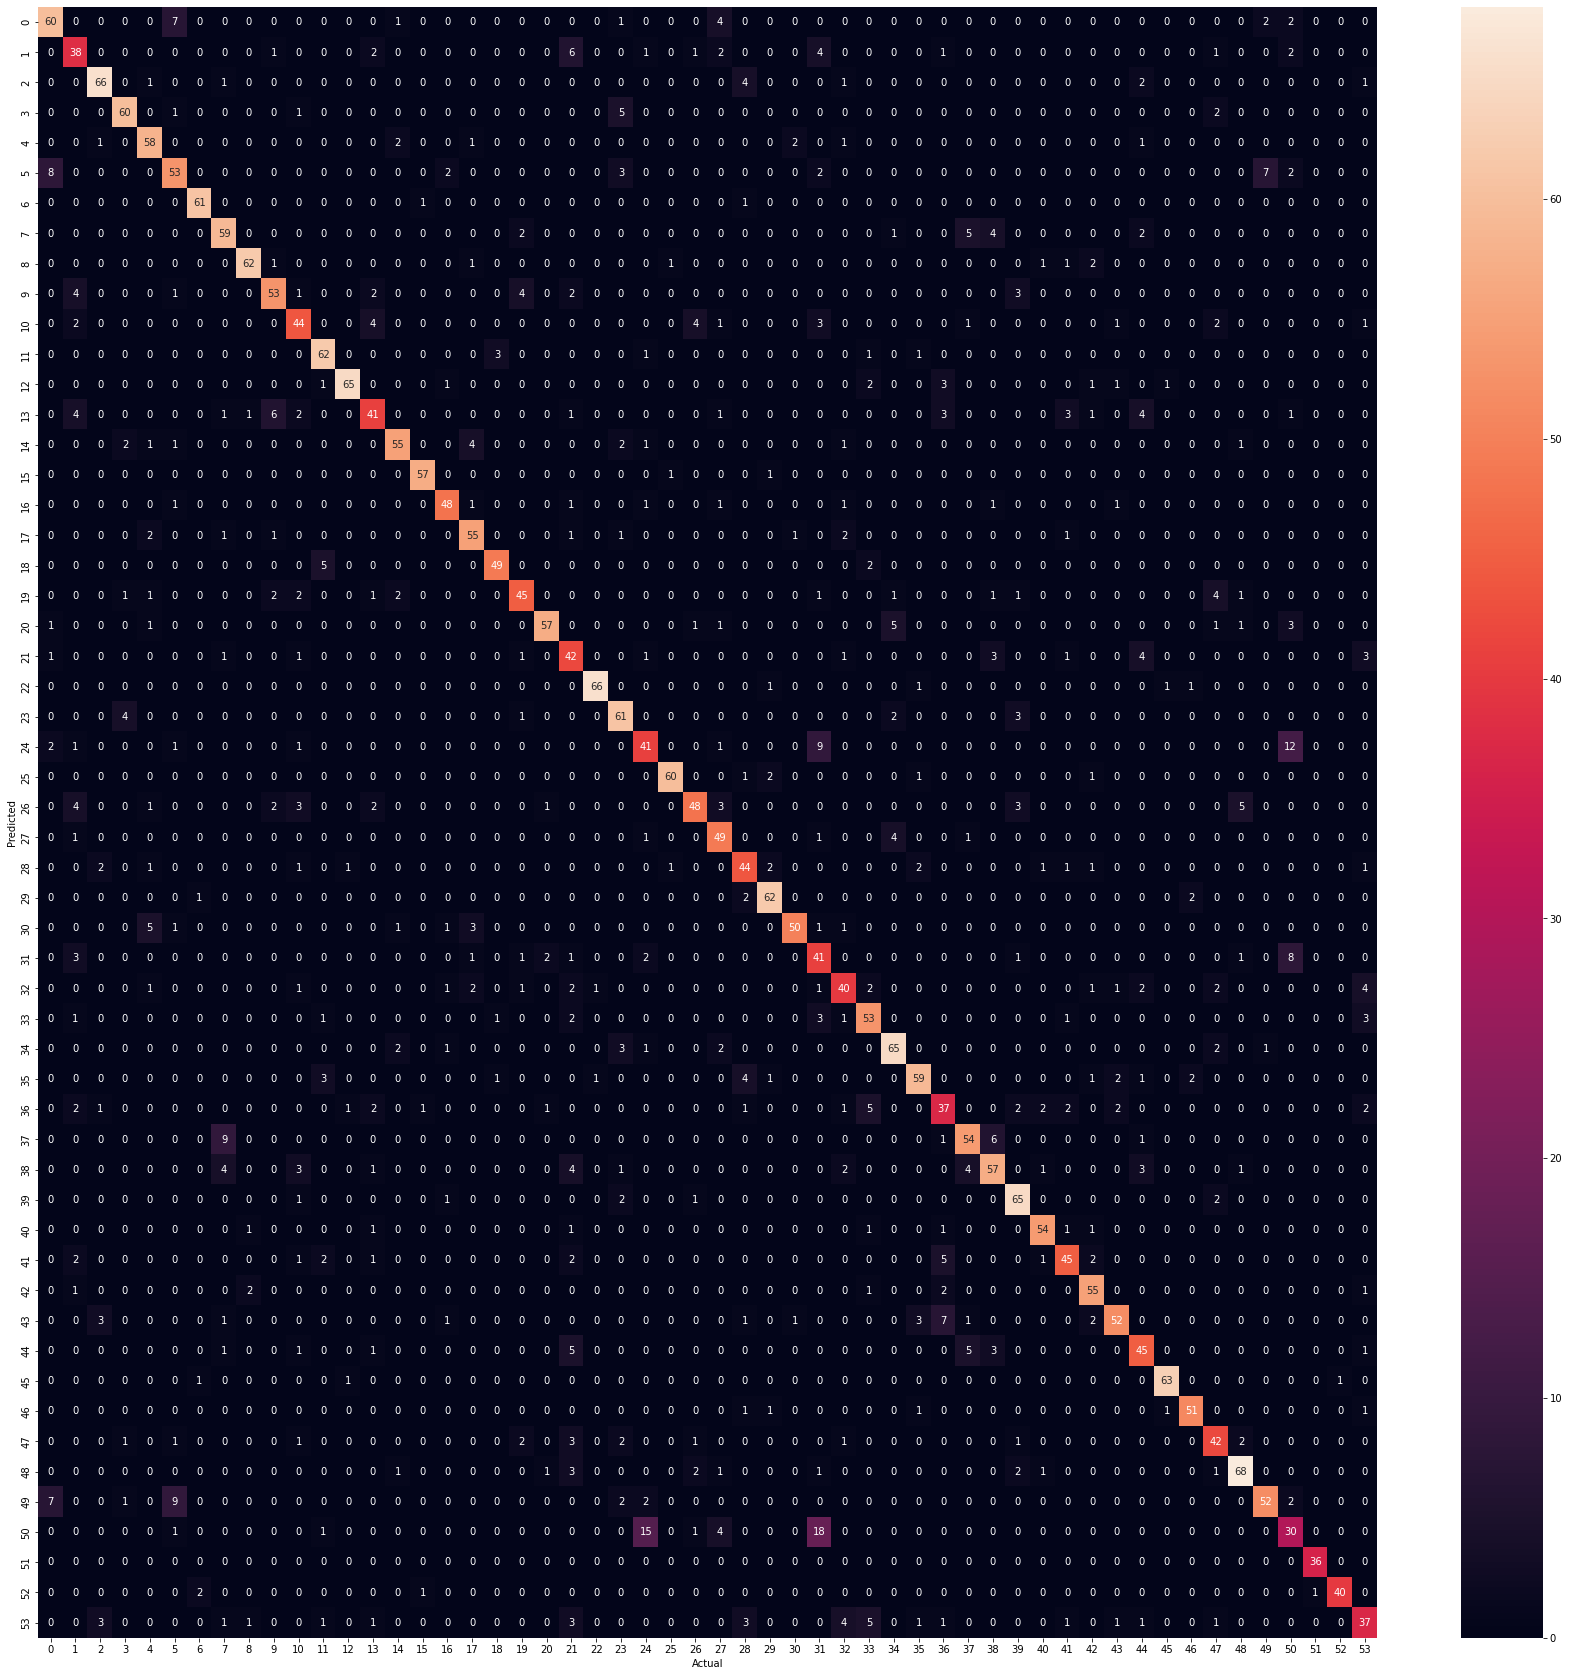

In [192]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>KNN Model was performing better than Decision Tree Model</strong>

<h3>RandomForest Regression Model</h3>

In [193]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       1.00      1.00      1.00       261
            Atlanta       1.00      1.00      1.00       279
BaltimoreWashington       1.00      1.00      1.00       262
              Boise       1.00      1.00      1.00       269
             Boston       1.00      1.00      1.00       272
   BuffaloRochester       1.00      1.00      1.00       261
         California       1.00      1.00      1.00       227
          Charlotte       1.00      1.00      1.00       265
            Chicago       1.00      1.00      1.00       269
   CincinnatiDayton       1.00      1.00      1.00       268
           Columbus       1.00      1.00      1.00       275
      DallasFtWorth       1.00      1.00      1.00       270
             Denver       1.00      1.00      1.00       263
            Detroit       1.00      1.00      1.00       269
        GrandRa

Text(249.0, 0.5, 'Predicted')

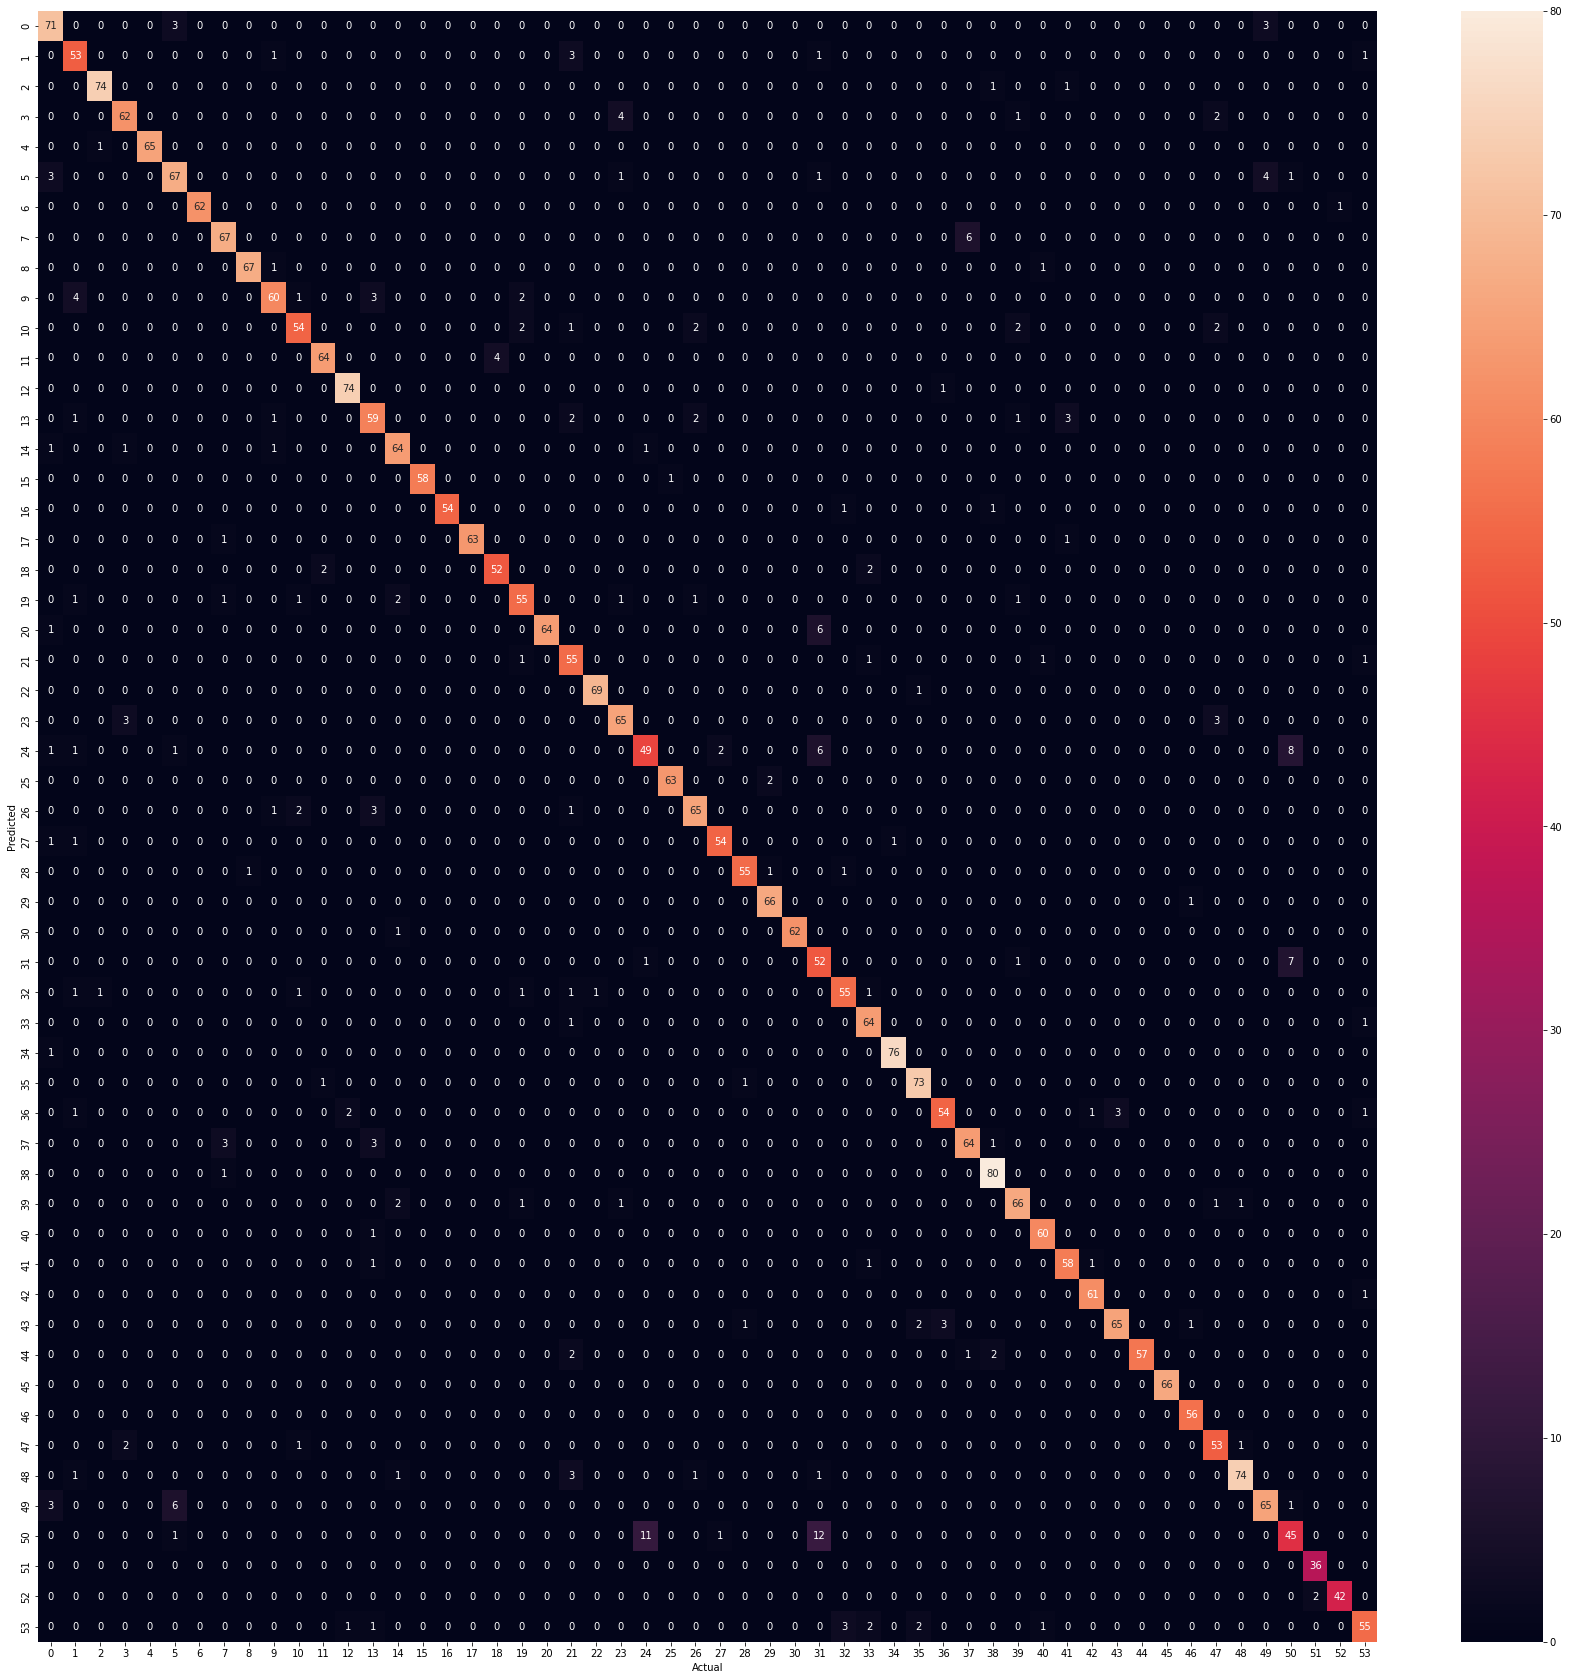

In [194]:
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [ ]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[10,50,100,200],
    'criterion':['gini', 'entropy'],
    'max_depth':[None,16,17,18,19,20],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[3,4,5],
    'max_leaf_nodes':[None,100,120],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score: --> ', grid_rf.best_score_)
print('Best params: -->', grid_rf.best_params_)

Building Model with best Parameters

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfcv = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=3, min_samples_leaf=3)

rfcv.fit(X_train, y_train)
y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9882601054481547
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       0.99      0.97      0.98       280
            Atlanta       0.98      0.98      0.98       268
BaltimoreWashington       1.00      1.00      1.00       266
              Boise       0.97      0.99      0.98       274
             Boston       0.99      0.99      0.99       271
   BuffaloRochester       0.95      0.99      0.97       247
         California       1.00      1.00      1.00       235
          Charlotte       1.00      1.00      1.00       262
            Chicago       1.00      1.00      1.00       266
   CincinnatiDayton       0.99      0.98      0.98       277
           Columbus       0.99      0.98      0.98       272
      DallasFtWorth       0.98      0.99      0.99       263
             Denver       1.00      1.00      1.00       264
            Detroit       0.97      0.98      0.97       272


Text(249.0, 0.5, 'Predicted')

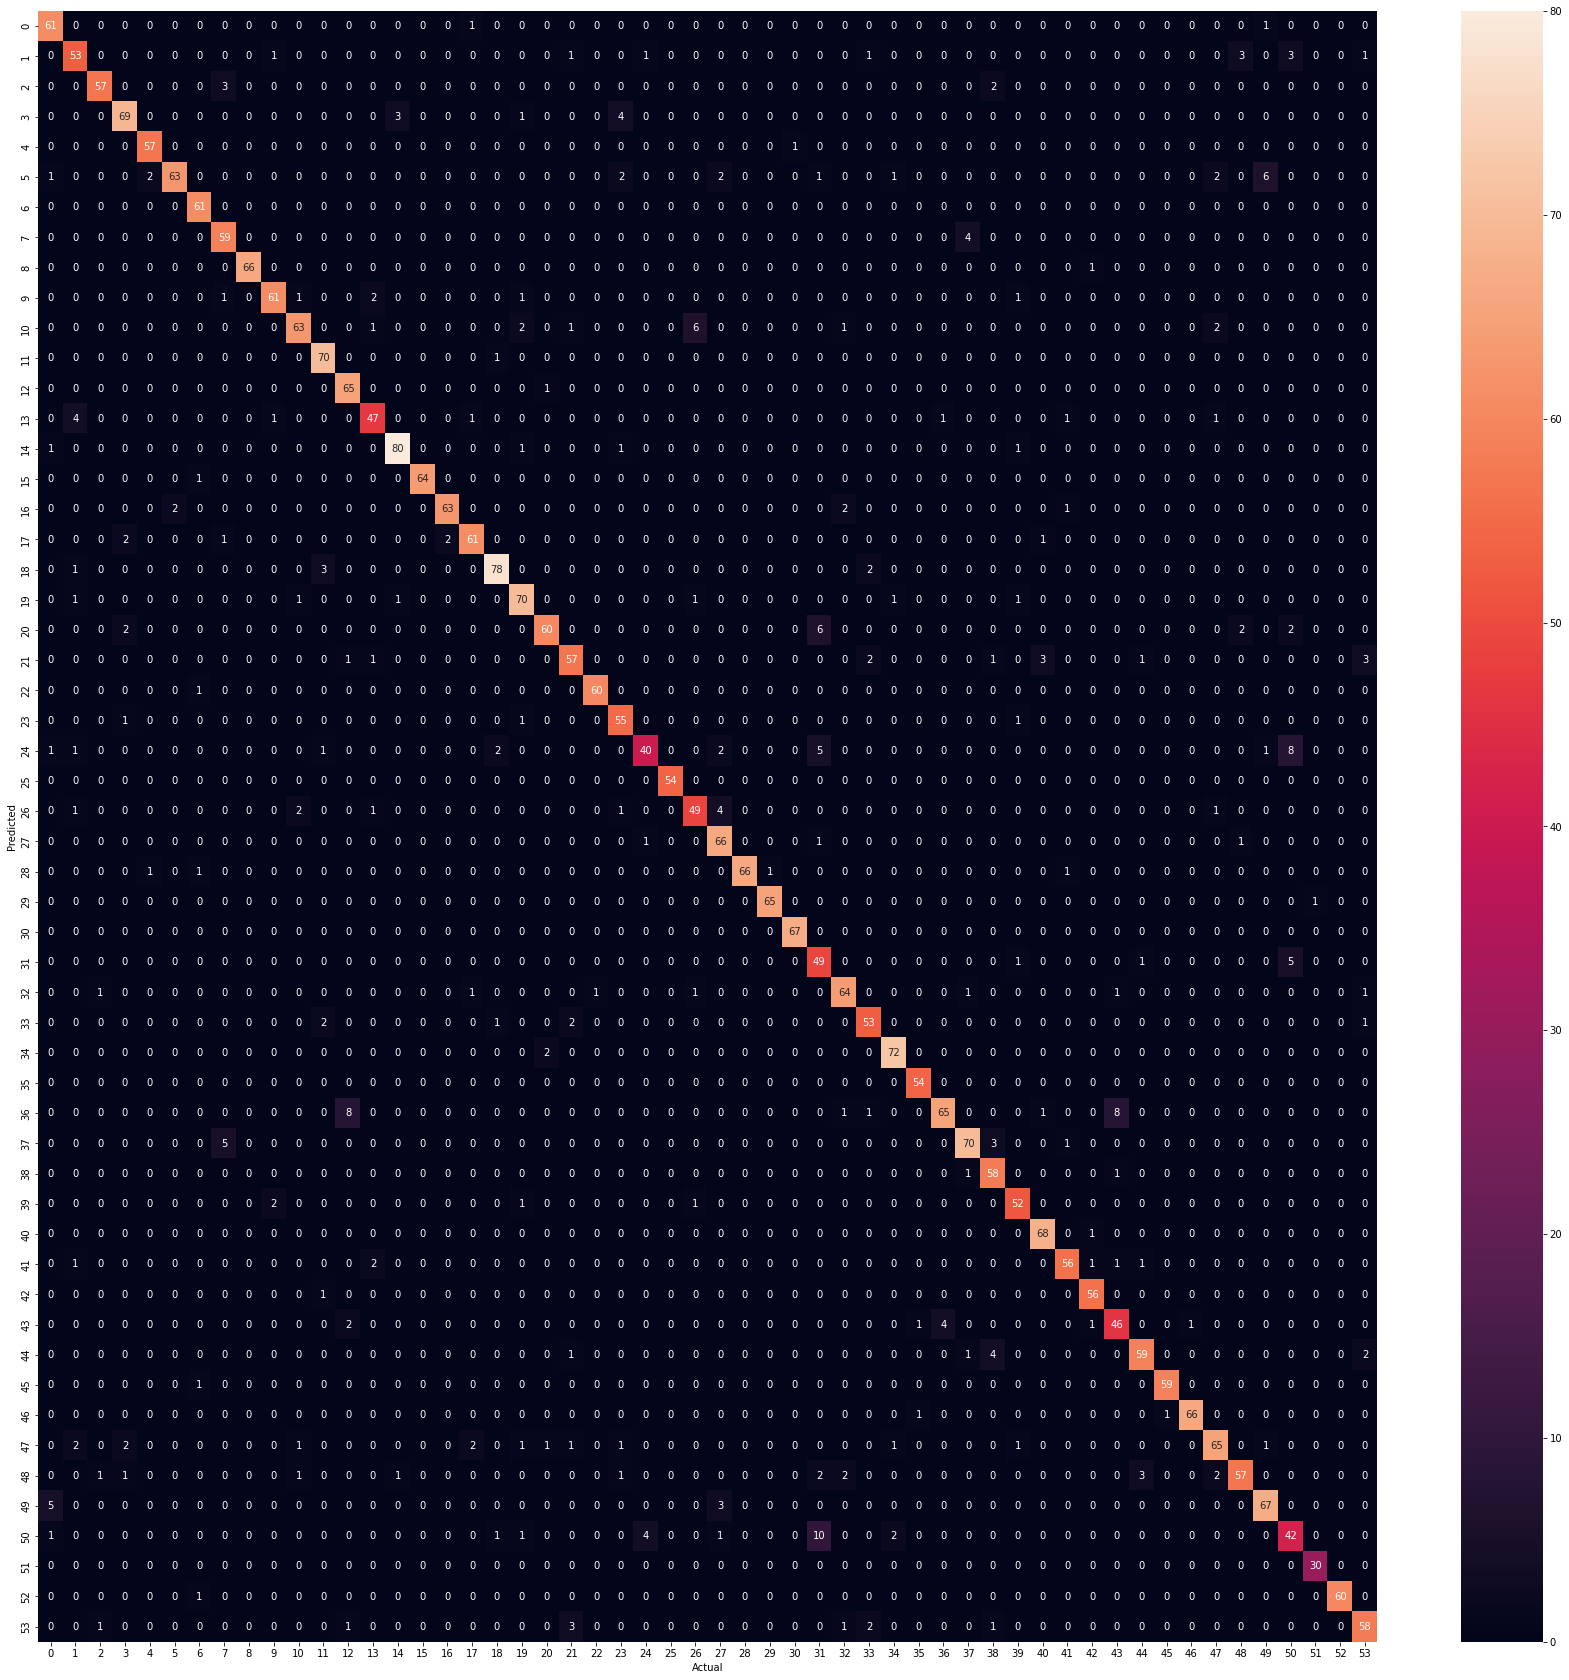

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>This Model is performing Better than KNN</strong>

<h3>XGBClassifier</h3>

In [57]:
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(X_train, y_train)
y_pred_train = xg.predict(X_train)
y_pred_test = xg.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

[10:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy :  1.0
Training Classification Report ======>>>> 
                      precision    recall  f1-score   support

             Albany       1.00      1.00      1.00       275
            Atlanta       1.00      1.00      1.00       274
BaltimoreWashington       1.00      1.00      1.00       276
              Boise       1.00      1.00      1.00       261
             Boston       1.00      1.00      1.00       280
   BuffaloRochester       1.00      1.00      1.00       258
         California       1.00      1.00      1.00       229
          Charlotte       1.00      1.00      1.00       275
            Chicago       1.00      1.00      1.00       271
   Cincin

Text(249.0, 0.5, 'Predicted')

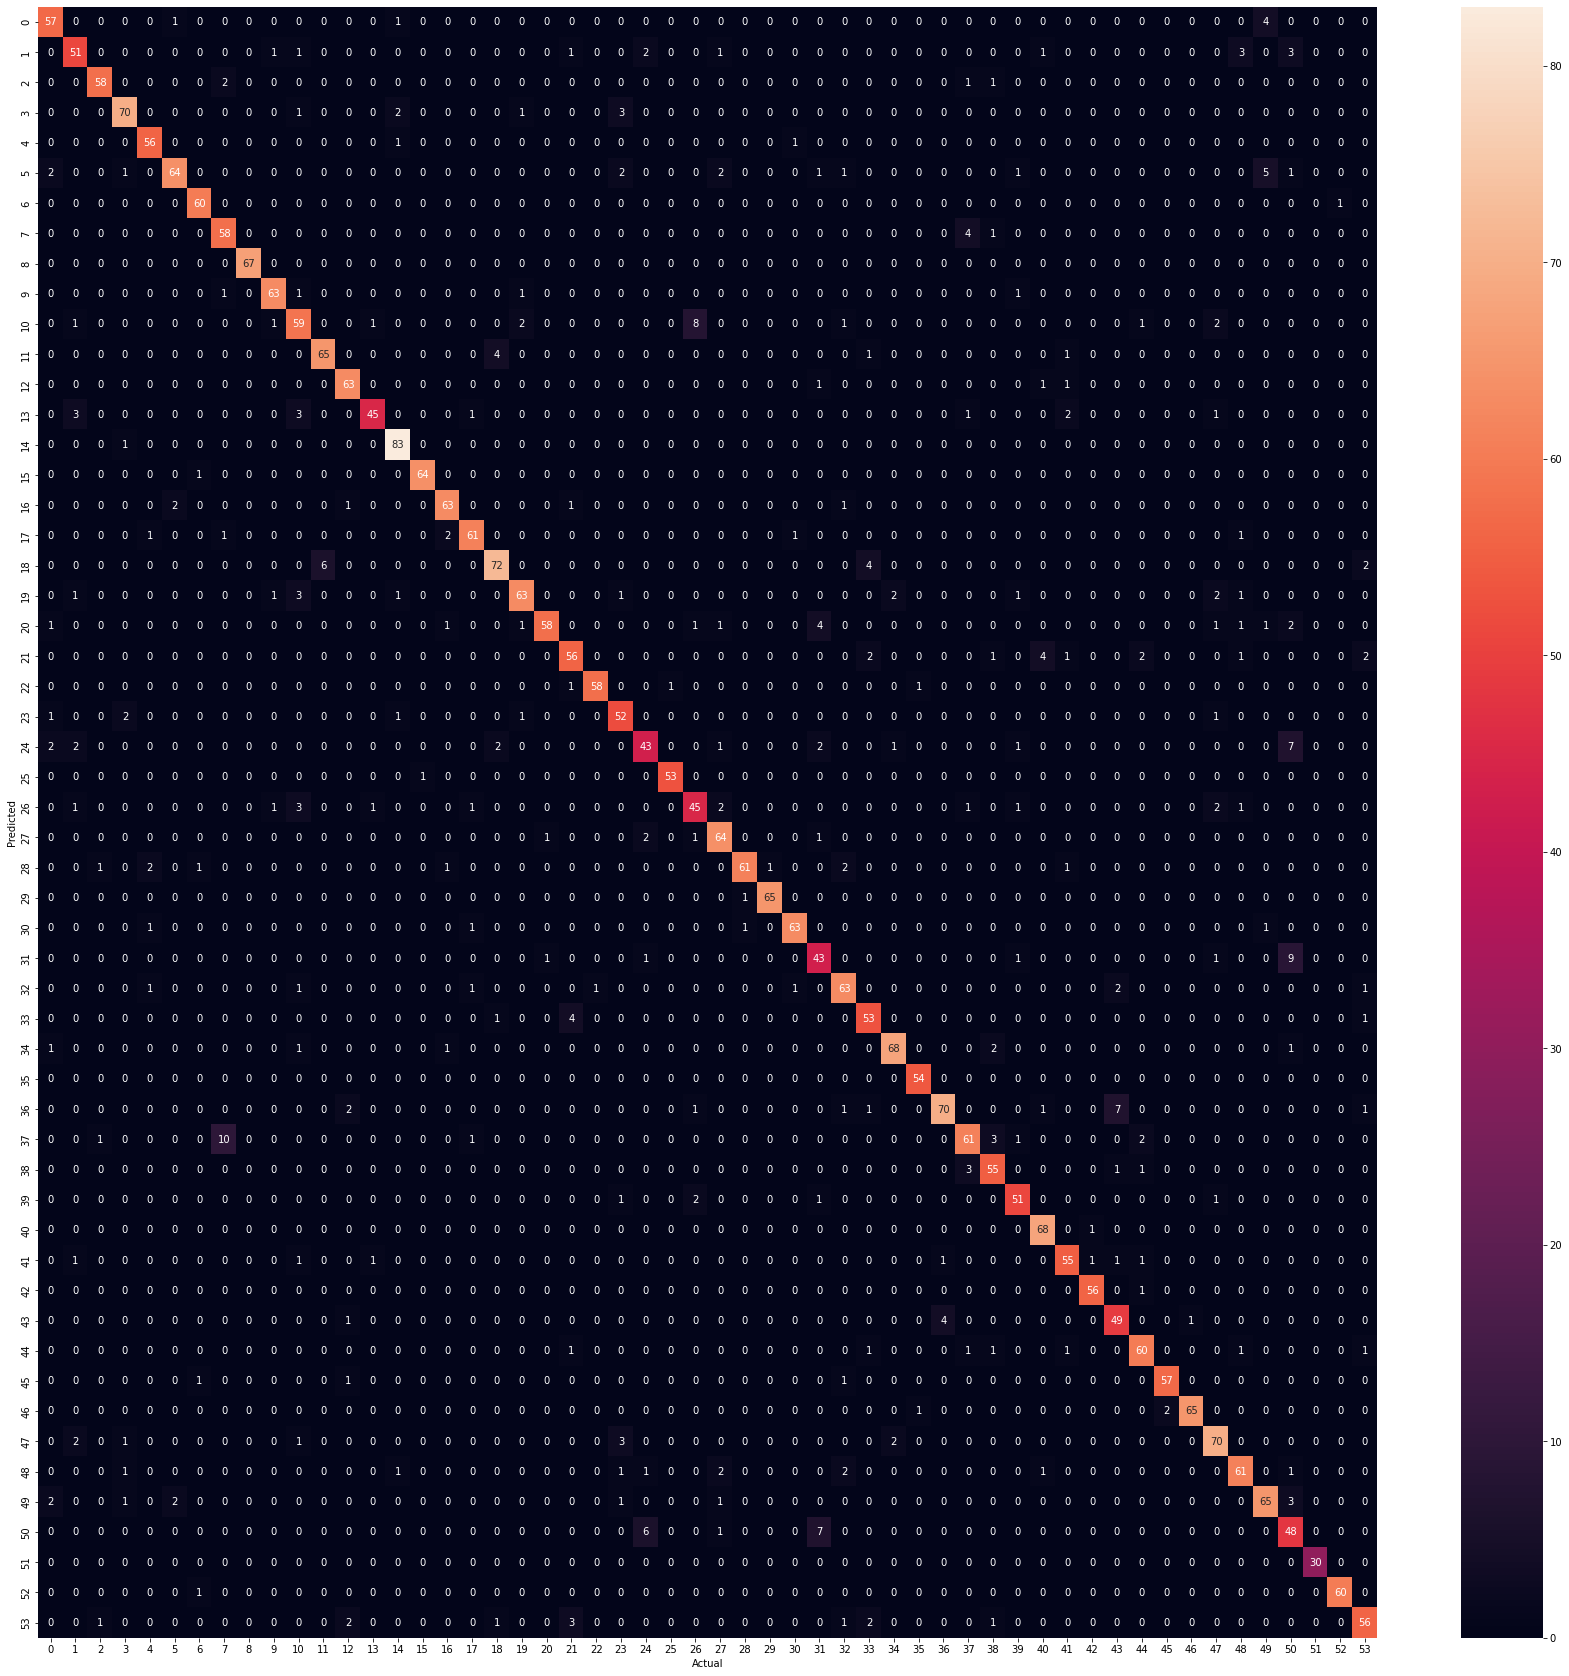

In [58]:
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Random Forest was the best model. Saving it as final</strong>

In [54]:
import pickle
pickle.dump(rfcv, open('Final_classification.pickle', 'wb'))